In [2]:
import os
import pickle
import glob
import random
import time

import pandas as pd
import numpy as np
import scipy.stats as stats
import xarray as xr
import matplotlib.pyplot as plt

import npc_lims
# from npc_sessions import DynamicRoutingSession


In [2]:
all_ephys_sessions = tuple(s for s in npc_lims.get_session_info(is_ephys=True, is_uploaded=True,))

In [3]:
session_projects={
    'session':[],
    'project':[]
}
for ss in all_ephys_sessions:
    session_projects['session'].append(str(ss.id+''))
    session_projects['project'].append(str(ss.project))

session_projects=pd.DataFrame(session_projects)
session_projects[:50]

session         project
0   712815_2024-05-20_0  DynamicRouting
1   708016_2024-05-02_0  DynamicRouting
2   708016_2024-05-01_0  DynamicRouting
3   708016_2024-04-30_0  DynamicRouting
4   708016_2024-04-29_0  DynamicRouting
5   706401_2024-04-25_0  DynamicRouting
6   703882_2024-04-25_0  DynamicRouting
7   703882_2024-04-24_0  DynamicRouting
8   706401_2024-04-24_0  DynamicRouting
9   703882_2024-04-23_0  DynamicRouting
10  703882_2024-04-22_0  DynamicRouting
11  706401_2024-04-22_0  DynamicRouting
12  703880_2024-04-18_0  DynamicRouting
13  699847_2024-04-18_0  DynamicRouting
14  703880_2024-04-17_0  DynamicRouting
15  699847_2024-04-17_0  DynamicRouting
16  703880_2024-04-16_0  DynamicRouting
17  699847_2024-04-16_0  DynamicRouting
18  703880_2024-04-15_0  DynamicRouting
19  699847_2024-04-15_0  DynamicRouting
20  703333_2024-04-11_0  DynamicRouting
21  703333_2024-04-10_0  DynamicRouting
22  703333_2024-04-09_0  DynamicRouting
23  703333_2024-04-08_0  DynamicRouting
24  702136_2024-03-07_0  DynamicRouting
25  702136_2024-03-06_0  DynamicRouting
26  702136_2024-03-05_0  DynamicRouting
27  702136_2024-03-04_0  DynamicRouting
28  702131_2024-02-26_0  DynamicRouting
29  676909_2023-12-14_0  DynamicRouting
30  676909_2023-12-13_0  DynamicRouting
31  676909_2023-12-12_0  DynamicRouting
32  676909_2023-12-11_0  DynamicRouting
33  686176_2023-12-07_0  DynamicRouting
34  686176_2023-12-06_0  DynamicRouting
35  686176_2023-12-05_0  DynamicRouting
36  686176_2023-12-04_0  DynamicRouting
37  690706_2023-11-30_0  DynamicRouting
38  690706_2023-11-29_0  DynamicRouting
39  690706_2023-11-28_0  DynamicRouting
40  690706_2023-11-27_0  DynamicRouting
41  664851_2023-11-16_0  DynamicRouting
42  664851_2023-11-15_0  DynamicRouting
43  664851_2023-11-14_0  DynamicRouting
44  664851_2023-11-13_0  DynamicRouting
45  686740_2023-10-26_0  DynamicRouting
46  686740_2023-10-25_0  DynamicRouting
47  686740_2023-10-24_0  DynamicRouting
48  686740_2023-10-23_0  DynamicRouting
49  681532_2023-10-19_0  DynamicRouting

In [27]:
#load decoding results
loadpath=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\linear_shift_spikes_SVC"

#loop through decoder results, append to dict
files=glob.glob(os.path.join(loadpath,'*_decoding_results*.pkl'))

decoder_results={}
for ii,ff in enumerate(files):
    with open(ff,'rb') as f:
        data=pickle.load(f)
    decoder_results[ff.split('\\')[-1].split('_decoding')[0]]=data[list(data.keys())[0]]


In [ ]:
# #load templeton units
# loadpath=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\linear_shift\combined\Templ_decoder_results.pkl"
# with open(loadpath,'rb') as f:
#     decoder_results=pickle.load(f)

# #load DR units
# loadpath=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\linear_shift\combined\DR_decoder_results.pkl"
# with open(loadpath,'rb') as f:
#     decoder_results=pickle.load(f)
# session_projects.to_csv(r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\session_projects.csv")

In [ ]:
###TODO: 
# re-run the decoding analysis with areas separated by probe
# also keep track of the average CCF location of the units for each area-probe

In [28]:
#one big loop
use_half_shifts=False

decoder_confidence_versus_response_type={
    'session':[],
    'area':[],
    'project':[],
    'vis_context_dprime':[],
    'vis_hit_confidence':[],
    'vis_fa_confidence':[],
    'vis_cr_confidence':[],
    'aud_context_dprime':[],
    'aud_hit_confidence':[],
    'aud_fa_confidence':[],
    'aud_cr_confidence':[],
}

decoder_confidence_dprime_by_block={
    'session':[],
    'area':[],
    'project':[],
    'block':[],
    'cross_modal_dprime':[],
    'confidence':[]
}

decoder_confidence_by_switch={
    'session':[],
    'area':[],
    'project':[],
    'switch_trial':[],
    'block':[],
    'dprime_before':[],
    'dprime_after':[],
    'confidence':[]
}

decoder_confidence_versus_trials_since_rewarded_target={
    'session':[],
    'area':[],
    'project':[],
    'trials_since_rewarded_target':[],
    'time_since_rewarded_target':[],
    'confidence':[],
}

decoder_confidence_before_after_target={
    'session':[],
    'area':[],
    'project':[],
    'cross_modal_dprime':[],
    'rewarded_target':[],
    'rewarded_target_plus_one':[],
    'non_rewarded_target':[],
    'non_rewarded_target_plus_one':[],
    'non_response_non_rewarded_target':[],
    'non_response_non_rewarded_target_plus_one':[],
    'non_response_non_target_trials':[],
    'non_response_non_target_trials_plus_one':[],
}

all_sessions=list(decoder_results.keys())

start_time=time.time()

##loop through sessions##
for session_id in all_sessions:
    session_start_time=time.time()
    session_id_str=str(session_id)
    #load session
    try:
        trials=pd.read_parquet(
                npc_lims.get_cache_path('trials',session_id,version='any')
                )
        performance=pd.read_parquet(
                npc_lims.get_cache_path('performance',session_id,version='any')
                )
    except:
        print('skipping session:',session_id)
        continue

    #add trials/time since last rewarded target to trials table
    trials_since_rewarded_target=[]
    time_since_rewarded_target=[]
    last_rewarded_time=np.nan
    last_rewarded_trial=np.nan

    for tt,trial in trials.iterrows():
        # print(tt)
        trials_since_rewarded_target.append(tt-last_rewarded_trial)
        time_since_rewarded_target.append(trial['start_time']-last_rewarded_time)
        if trial['is_rewarded'] and trial['is_target'] and trial['is_response']:
            last_rewarded_time=trial['reward_time']
            last_rewarded_trial=tt
    trials['trials_since_rewarded_target']=trials_since_rewarded_target
    trials['time_since_rewarded_target']=time_since_rewarded_target
    
    #select the middle 4 blocks
    trials_middle=trials.iloc[decoder_results[session_id]['middle_4_blocks']]
    trials_middle=trials_middle.reset_index()
    trials_middle['id']=trials_middle.index.values
    

    areas=list(decoder_results[session_id]['results'].keys())

    ##loop through areas##
    for aa in areas:
        if type(aa)==str and 'probe' in aa:
            area_name=aa.split('_')[0]
        else:
            area_name=aa
        #make corrected decoder confidence
        shifts=decoder_results[session_id]['shifts']
        areas=decoder_results[session_id]['areas']
        half_neg_shift=np.round(shifts.min()/2)
        half_pos_shift=np.round(shifts.max()/2)
        half_neg_shift_ind=np.where(shifts==half_neg_shift)[0][0]
        half_pos_shift_ind=np.where(shifts==half_pos_shift)[0][0]
        half_shift_inds=np.arange(half_neg_shift_ind,half_pos_shift_ind+1)
        if use_half_shifts==False:
            half_shift_inds=np.asarray(list(decoder_results[session_id]['results'][aa]['shift'].keys()))

        decision_function_shifts=[]

        for sh in half_shift_inds:
            decision_function_shifts.append(decoder_results[session_id]['results'][aa]['shift'][sh]['decision_function'])

        # true_label=decoder_results[session_id]['results'][aa]['shift'][np.where(shifts==0)[0][0]]['true_label']
        try:
            decision_function_shifts=np.vstack(decision_function_shifts)
        except:
            print(session_id,'failed to stack decision functions; skipping')
            continue
        
        #normalize all decision function values to the stdev of all the nulls
        decision_function_shifts=decision_function_shifts/np.nanstd(decision_function_shifts[:])
        

        corrected_decision_function=decision_function_shifts[shifts[half_shift_inds]==0,:].flatten()-np.median(decision_function_shifts,axis=0)

        #option to normalize after
        # corrected_decision_function=corrected_decision_function/np.std(corrected_decision_function)

        #find average confidence per hit, fa, cr
        vis_HIT_mean=np.mean(corrected_decision_function[trials_middle.query('(is_correct==True and is_target==True and is_vis_context==True and \
                                                                             is_response==True and is_reward_scheduled==False)').index.values])
        aud_HIT_mean=np.mean(corrected_decision_function[trials_middle.query('(is_correct==True and is_target==True and is_vis_context==False and \
                                                                             is_response==True and is_reward_scheduled==False)').index.values])
        vis_CR_mean=np.mean(corrected_decision_function[trials_middle.query('(is_correct==True and is_target==True and is_vis_context==True and \
                                                                            is_response==False and is_reward_scheduled==False)').index.values])
        aud_CR_mean=np.mean(corrected_decision_function[trials_middle.query('(is_correct==True and is_target==True and is_vis_context==False and \
                                                                            is_response==False and is_reward_scheduled==False)').index.values])
        vis_FA_mean=np.mean(corrected_decision_function[trials_middle.query('(is_correct==False and is_target==True and is_vis_context==True and \
                                                                            is_response==True and is_reward_scheduled==False)').index.values])
        aud_FA_mean=np.mean(corrected_decision_function[trials_middle.query('(is_correct==False and is_target==True and is_vis_context==False and \
                                                                            is_response==True and is_reward_scheduled==False)').index.values])
        #append to table
        decoder_confidence_versus_response_type['session'].append(session_id)
        decoder_confidence_versus_response_type['area'].append(area_name)
        decoder_confidence_versus_response_type['project'].append(session_projects.query('session==@session_id_str')['project'].values[0])
        if performance.query('rewarded_modality=="vis"').empty:
            decoder_confidence_versus_response_type['vis_context_dprime'].append(np.nan)
        else:
            decoder_confidence_versus_response_type['vis_context_dprime'].append(performance.query('rewarded_modality=="vis"')['cross_modal_dprime'].values[0])
        decoder_confidence_versus_response_type['vis_hit_confidence'].append(vis_HIT_mean)
        decoder_confidence_versus_response_type['vis_fa_confidence'].append(vis_FA_mean)
        decoder_confidence_versus_response_type['vis_cr_confidence'].append(vis_CR_mean)
        if performance.query('rewarded_modality=="aud"').empty:
            decoder_confidence_versus_response_type['aud_context_dprime'].append(np.nan)
        else:
            decoder_confidence_versus_response_type['aud_context_dprime'].append(performance.query('rewarded_modality=="aud"')['cross_modal_dprime'].values[0])
        decoder_confidence_versus_response_type['aud_hit_confidence'].append(aud_HIT_mean)
        decoder_confidence_versus_response_type['aud_fa_confidence'].append(aud_FA_mean)
        decoder_confidence_versus_response_type['aud_cr_confidence'].append(aud_CR_mean)

        #find decoder confidence according to time/trials since last rewarded target
        #3 arrays - time since last rewarded target, trials since last rewarded target, decoder confidence
        trials_since_rewarded_target=trials_middle.query('is_reward_scheduled==False')['trials_since_rewarded_target'].values
        time_since_rewarded_target=trials_middle.query('is_reward_scheduled==False')['time_since_rewarded_target'].values
        confidence=corrected_decision_function[trials_middle.query('is_reward_scheduled==False').index.values]
        for tt,trial in trials_middle.query('is_reward_scheduled==False').reset_index().iterrows():
            #reverse sign if other modality
            if trial['is_aud_context']:
                confidence[tt]=-confidence[tt]

        #append to table per session and area
        decoder_confidence_versus_trials_since_rewarded_target['session'].append(session_id)
        decoder_confidence_versus_trials_since_rewarded_target['area'].append(area_name)
        decoder_confidence_versus_trials_since_rewarded_target['project'].append(session_projects.query('session==@session_id_str')['project'].values[0])
        decoder_confidence_versus_trials_since_rewarded_target['trials_since_rewarded_target'].append(trials_since_rewarded_target)
        decoder_confidence_versus_trials_since_rewarded_target['time_since_rewarded_target'].append(time_since_rewarded_target)
        decoder_confidence_versus_trials_since_rewarded_target['confidence'].append(confidence)

        ##loop through blocks##
        blocks=trials_middle['block_index'].unique()
        for bb in blocks:
            block_trials=trials_middle.query('block_index==@bb and is_reward_scheduled==False')
            #find average confidence and dprime for the block
            if block_trials['is_vis_context'].values[0]:
                multiplier=1
            elif block_trials['is_aud_context'].values[0]:
                multiplier=-1
            
            block_dprime=performance.query('block_index==@bb')['cross_modal_dprime'].values[0]
            block_mean=np.nanmean(corrected_decision_function[block_trials.index.values])*multiplier

            #append to table
            decoder_confidence_dprime_by_block['session'].append(session_id)
            decoder_confidence_dprime_by_block['area'].append(area_name)
            decoder_confidence_dprime_by_block['project'].append(session_projects.query('session==@session_id_str')['project'].values[0])
            decoder_confidence_dprime_by_block['block'].append(bb)
            decoder_confidence_dprime_by_block['cross_modal_dprime'].append(block_dprime)
            decoder_confidence_dprime_by_block['confidence'].append(block_mean)

        #get confidence around the block switch
        switch_trials=trials_middle.query('is_context_switch')
        ##loop through switches##
        for st,switch_trial in switch_trials.iloc[1:].iterrows():
            if switch_trial['is_vis_context']:
                multiplier=1
            elif switch_trial['is_aud_context']:
                multiplier=-1
            switch_trial_block_index=switch_trial['block_index']
            #append to table
            decoder_confidence_by_switch['session'].append(session_id)
            decoder_confidence_by_switch['area'].append(area_name)
            decoder_confidence_by_switch['project'].append(session_projects.query('session==@session_id_str')['project'].values[0])
            decoder_confidence_by_switch['switch_trial'].append(switch_trial['id'])
            decoder_confidence_by_switch['block'].append(switch_trial_block_index)
            decoder_confidence_by_switch['dprime_before'].append(performance.query('block_index==(@switch_trial_block_index-1)')['cross_modal_dprime'].values[0])
            decoder_confidence_by_switch['dprime_after'].append(performance.query('block_index==(@switch_trial_block_index)')['cross_modal_dprime'].values[0])
            decoder_confidence_by_switch['confidence'].append(corrected_decision_function[switch_trial['id']-20:switch_trial['id']+30]*multiplier)

        #decoder confidence before/after rewarded target, response to non-rewarded target, non-response to non-rewarded target
        sign_corrected_decision_function=corrected_decision_function.copy()
        for tt,trial in trials_middle.iterrows():
            if trial['is_aud_context']:
                sign_corrected_decision_function[tt]=-sign_corrected_decision_function[tt]
        #find trial and trial+1 of rewarded targets
        rewarded_target_trials=trials_middle.query('is_rewarded==True and is_target==True and is_response==True and is_reward_scheduled==False').index.values
        rewarded_target_trials_plus_one=rewarded_target_trials+1
        if rewarded_target_trials_plus_one[-1]>=len(corrected_decision_function):
            rewarded_target_trials=rewarded_target_trials[:-1]
            rewarded_target_trials_plus_one=rewarded_target_trials_plus_one[:-1]

        #find trials and trials+1 of non-rewarded targets
        non_rewarded_target_trials=trials_middle.query('is_rewarded==False and is_target==True and is_response==True').index.values
        non_rewarded_target_trials_plus_one=non_rewarded_target_trials+1
        if len(non_rewarded_target_trials_plus_one)>0:
            if non_rewarded_target_trials_plus_one[-1]>=len(corrected_decision_function):
                non_rewarded_target_trials=non_rewarded_target_trials[:-1]
                non_rewarded_target_trials_plus_one=non_rewarded_target_trials_plus_one[:-1]

        #find trials and trials+1 of non-response to non-rewarded targets
        non_response_non_rewarded_target_trials=trials_middle.query('is_rewarded==False and is_target==True and is_response==False').index.values
        non_response_non_rewarded_target_trials_plus_one=non_response_non_rewarded_target_trials+1
        if len(non_response_non_rewarded_target_trials_plus_one)>0:
            if non_response_non_rewarded_target_trials_plus_one[-1]>=len(corrected_decision_function):
                non_response_non_rewarded_target_trials=non_response_non_rewarded_target_trials[:-1]
                non_response_non_rewarded_target_trials_plus_one=non_response_non_rewarded_target_trials_plus_one[:-1]

        non_response_non_target_trials=trials_middle.query('is_rewarded==False and is_target==False and is_response==False').index.values
        non_response_non_target_trials_plus_one=non_response_non_target_trials+1
        if len(non_response_non_target_trials_plus_one)>0:
            if non_response_non_target_trials_plus_one[-1]>=len(corrected_decision_function):
                non_response_non_target_trials=non_response_non_target_trials[:-1]
                non_response_non_target_trials_plus_one=non_response_non_target_trials_plus_one[:-1]

        #append to table
        decoder_confidence_before_after_target['session'].append(session_id)
        decoder_confidence_before_after_target['area'].append(area_name)
        decoder_confidence_before_after_target['project'].append(session_projects.query('session==@session_id_str')['project'].values[0])
        decoder_confidence_before_after_target['cross_modal_dprime'].append(performance['cross_modal_dprime'].mean())
        decoder_confidence_before_after_target['rewarded_target'].append(sign_corrected_decision_function[rewarded_target_trials])
        decoder_confidence_before_after_target['rewarded_target_plus_one'].append(sign_corrected_decision_function[rewarded_target_trials_plus_one])
        if len(non_rewarded_target_trials)>0:
            decoder_confidence_before_after_target['non_rewarded_target'].append(sign_corrected_decision_function[non_rewarded_target_trials])
            decoder_confidence_before_after_target['non_rewarded_target_plus_one'].append(sign_corrected_decision_function[non_rewarded_target_trials_plus_one])
        else:
            decoder_confidence_before_after_target['non_rewarded_target'].append(np.nan)
            decoder_confidence_before_after_target['non_rewarded_target_plus_one'].append(np.nan)
        if len(non_response_non_rewarded_target_trials)>0:
            decoder_confidence_before_after_target['non_response_non_rewarded_target'].append(sign_corrected_decision_function[non_response_non_rewarded_target_trials])
            decoder_confidence_before_after_target['non_response_non_rewarded_target_plus_one'].append(sign_corrected_decision_function[non_response_non_rewarded_target_trials_plus_one])        
        else:
            decoder_confidence_before_after_target['non_response_non_rewarded_target'].append(np.nan)
            decoder_confidence_before_after_target['non_response_non_rewarded_target_plus_one'].append(np.nan)
        decoder_confidence_before_after_target['non_response_non_target_trials'].append(sign_corrected_decision_function[non_response_non_target_trials])
        decoder_confidence_before_after_target['non_response_non_target_trials_plus_one'].append(sign_corrected_decision_function[non_response_non_target_trials_plus_one])

    total_time=time.time()-start_time
    session_time=time.time()-session_start_time
    print('finished session:',session_id)
    print('session time: ',session_time,' seconds;  total time:',total_time,' seconds')

decoder_confidence_versus_response_type=pd.DataFrame(decoder_confidence_versus_response_type)
decoder_confidence_dprime_by_block=pd.DataFrame(decoder_confidence_dprime_by_block)
decoder_confidence_by_switch=pd.DataFrame(decoder_confidence_by_switch)
decoder_confidence_versus_trials_since_rewarded_target=pd.DataFrame(decoder_confidence_versus_trials_since_rewarded_target)
decoder_confidence_before_after_target=pd.DataFrame(decoder_confidence_before_after_target)


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 620263_2022-07-26_0
session time:  7.868924856185913  seconds;  total time: 7.871916770935059  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 620263_2022-07-27_0
session time:  9.253216981887817  seconds;  total time: 17.126131296157837  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 620264_2022-08-02_0
session time:  5.33895468711853  seconds;  total time: 22.46807837486267  seconds
finished session: 626791_2022-08-15_0
session time:  5.9269397258758545  seconds;  total time: 28.396015882492065  seconds
finished session: 626791_2022-08-16_0
session time:  3.80989146232605  seconds;  total time: 32.2069046497345  seconds
finished session: 626791_2022-08-17_0
session time:  5.676272630691528  seconds;  total time: 37.88417458534241  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 628801_2022-09-19_0
session time:  4.88705849647522  seconds;  total time: 42.772231340408325  seconds
skipping session: 628801_2022-09-20_0


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 636397_2022-09-26_0
session time:  5.314305782318115  seconds;  total time: 52.14103817939758  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 636397_2022-09-27_0
session time:  4.839502573013306  seconds;  total time: 56.981544733047485  seconds
finished session: 636766_2023-01-23_0
session time:  5.742483139038086  seconds;  total time: 62.72402787208557  seconds
finished session: 636766_2023-01-24_0
session time:  6.183412075042725  seconds;  total time: 68.9074399471283  seconds
finished session: 636766_2023-01-25_0
session time:  6.816039800643921  seconds;  total time: 75.72347974777222  seconds
finished session: 636766_2023-01-26_0
session time:  4.931224822998047  seconds;  total time: 80.65470457077026  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 644547_2022-12-05_0
session time:  4.45137882232666  seconds;  total time: 85.10608339309692  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 644547_2022-12-06_0
session time:  5.238535165786743  seconds;  total time: 90.34461855888367  seconds
finished session: 644864_2023-01-30_0
session time:  5.909663915634155  seconds;  total time: 96.25428247451782  seconds
finished session: 644864_2023-01-31_0
session time:  6.5832679271698  seconds;  total time: 102.83755040168762  seconds
finished session: 644866_2023-02-07_0
session time:  5.671977281570435  seconds;  total time: 108.50952768325806  seconds
finished session: 644866_2023-02-08_0
session time:  4.987012624740601  seconds;  total time: 113.49654030799866  seconds
finished session: 644866_2023-02-09_0
session time:  6.397525787353516  seconds;  total time: 119.89406609535217  seconds
finished session: 644866_2023-02-10_0
session time:  6.402233839035034  seconds;  total time: 126.2962999343872  seconds
finished session: 644867_2023-02-20_0
session time:  7.682063341140747  seconds;  total time: 133.98737215995789  seconds
finished session: 644867_2023

c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 646318_2023-01-17_0
session time:  4.22870135307312  seconds;  total time: 151.52040338516235  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 646318_2023-01-18_0
session time:  7.579778671264648  seconds;  total time: 159.100182056427  seconds
finished session: 649943_2023-02-13_0
session time:  8.422044038772583  seconds;  total time: 167.52222609519958  seconds
finished session: 649943_2023-02-14_0
session time:  6.731774568557739  seconds;  total time: 174.25400066375732  seconds
finished session: 649943_2023-02-15_0
session time:  7.84513521194458  seconds;  total time: 182.0991358757019  seconds
finished session: 649943_2023-02-16_0
session time:  7.655341148376465  seconds;  total time: 189.75447702407837  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 649944_2023-02-27_0
session time:  4.6114654541015625  seconds;  total time: 194.3679428100586  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 649944_2023-02-28_0
session time:  5.714991569519043  seconds;  total time: 200.08293437957764  seconds
finished session: 660023_2023-08-09_0
session time:  7.790127515792847  seconds;  total time: 207.87306189537048  seconds
finished session: 662892_2023-08-21_0
session time:  4.570298194885254  seconds;  total time: 212.44336009025574  seconds
finished session: 662892_2023-08-22_0
session time:  5.325339317321777  seconds;  total time: 217.76869940757751  seconds
finished session: 662892_2023-08-23_0
session time:  4.532788991928101  seconds;  total time: 222.30148839950562  seconds
finished session: 662892_2023-08-24_0
session time:  4.181095838546753  seconds;  total time: 226.48258423805237  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 662983_2023-05-15_0
session time:  4.11712646484375  seconds;  total time: 230.59971070289612  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 662983_2023-05-16_0
session time:  5.048352956771851  seconds;  total time: 235.64806365966797  seconds
finished session: 664851_2023-11-13_0
session time:  6.5346715450286865  seconds;  total time: 242.18373370170593  seconds
finished session: 664851_2023-11-14_0
session time:  4.606434106826782  seconds;  total time: 246.79116225242615  seconds
finished session: 664851_2023-11-15_0
session time:  6.036904811859131  seconds;  total time: 252.82806706428528  seconds
finished session: 664851_2023-11-16_0
session time:  5.7048726081848145  seconds;  total time: 258.5339388847351  seconds
finished session: 666986_2023-08-15_0
session time:  7.126218318939209  seconds;  total time: 265.6601572036743  seconds
finished session: 666986_2023-08-16_0
session time:  7.232209920883179  seconds;  total time: 272.8923671245575  seconds
finished session: 666986_2023-08-17_0
session time:  7.129343748092651  seconds;  total time: 280.02171087265015  seconds
finished session: 667252_

c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 668759_2023-07-11_0
session time:  6.339409828186035  seconds;  total time: 316.16744780540466  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 668759_2023-07-12_0
session time:  6.226352214813232  seconds;  total time: 322.3938000202179  seconds
skipping session: 668759_2023-07-13_0


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 670180_2023-07-26_0
session time:  8.164764404296875  seconds;  total time: 334.7609295845032  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 670180_2023-07-27_0
session time:  5.027616262435913  seconds;  total time: 339.7885458469391  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 670181_2023-07-18_0
session time:  5.791146993637085  seconds;  total time: 345.5796928405762  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 670248_2023-08-01_0
session time:  6.515523910522461  seconds;  total time: 352.09521675109863  seconds
skipping session: 670248_2023-08-03_0
finished session: 674562_2023-10-02_0
session time:  6.069726228713989  seconds;  total time: 362.24538254737854  seconds
finished session: 674562_2023-10-03_0
session time:  8.167763948440552  seconds;  total time: 370.41414403915405  seconds
finished session: 674562_2023-10-04_0
session time:  7.394477844238281  seconds;  total time: 377.80862188339233  seconds
finished session: 674562_2023-10-05_0
session time:  8.107758045196533  seconds;  total time: 385.91637992858887  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 676909_2023-12-11_0
session time:  5.0552191734313965  seconds;  total time: 390.9716372489929  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 676909_2023-12-12_0
session time:  7.840809345245361  seconds;  total time: 398.8132791519165  seconds
finished session: 676909_2023-12-13_0
session time:  5.016219854354858  seconds;  total time: 403.82949900627136  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 676909_2023-12-14_0
session time:  4.670399904251099  seconds;  total time: 408.49989891052246  seconds
finished session: 681532_2023-10-16_0
session time:  4.567990064620972  seconds;  total time: 413.068886756897  seconds
finished session: 681532_2023-10-17_0
session time:  5.296721696853638  seconds;  total time: 418.3656084537506  seconds
finished session: 681532_2023-10-18_0
session time:  6.963104963302612  seconds;  total time: 425.3297107219696  seconds
skipping session: 681532_2023-10-19_0
finished session: 686176_2023-12-05_0
session time:  6.227854490280151  seconds;  total time: 435.70065569877625  seconds
skipping session: 686176_2023-12-06_0
finished session: 686176_2023-12-07_0
session time:  6.660292863845825  seconds;  total time: 446.58747601509094  seconds
finished session: 686740_2023-10-23_0
session time:  9.820964097976685  seconds;  total time: 456.4084401130676  seconds
finished session: 686740_2023-10-24_0
session time:  5.800099611282349  sec

c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 699847_2024-04-15_0
session time:  5.117689847946167  seconds;  total time: 496.4513750076294  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 699847_2024-04-16_0
session time:  5.1456053256988525  seconds;  total time: 501.59797835350037  seconds
finished session: 699847_2024-04-17_0
session time:  5.706432580947876  seconds;  total time: 507.30541014671326  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 699847_2024-04-18_0
session time:  4.355464458465576  seconds;  total time: 511.66087460517883  seconds
finished session: 702131_2024-02-26_0
session time:  4.380002975463867  seconds;  total time: 516.0408775806427  seconds
finished session: 702136_2024-03-05_0
session time:  1.288609504699707  seconds;  total time: 517.3294870853424  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret

finished session: 703333_2024-04-08_0
session time:  7.41903018951416  seconds;  total time: 524.7485172748566  seconds


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [1]:
session_id

NameError: name 'session_id' is not defined

In [10]:
session_id_str

'620263_2022-07-26_0_decoding_results_LDA.pkl'

In [ ]:
for xx in decision_function_shifts:
    print(len(xx))

In [29]:
#save results
# decoder_confidence_versus_response_type=pd.DataFrame(decoder_confidence_versus_response_type)
# decoder_confidence_dprime_by_block=pd.DataFrame(decoder_confidence_dprime_by_block)
# decoder_confidence_by_switch=pd.DataFrame(decoder_confidence_by_switch)
# decoder_confidence_versus_trials_since_rewarded_target=pd.DataFrame(decoder_confidence_versus_trials_since_rewarded_target)
# decoder_confidence_before_after_target=pd.DataFrame(decoder_confidence_before_after_target)

# savepath=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\linear_shift_spikes_SVC\combined"
# decoder_confidence_versus_response_type.to_csv(os.path.join(savepath,'decoder_confidence_versus_response_type.csv'))
# decoder_confidence_dprime_by_block.to_csv(os.path.join(savepath,'decoder_confidence_dprime_by_block.csv'))
# decoder_confidence_by_switch.to_csv(os.path.join(savepath,'decoder_confidence_by_switch.csv'))
# decoder_confidence_versus_trials_since_rewarded_target.to_csv(os.path.join(savepath,'decoder_confidence_versus_trials_since_rewarded_target.csv'))
# decoder_confidence_before_after_target.to_csv(os.path.join(savepath,'decoder_confidence_before_after_target.csv'))

In [5]:
#load results
loadpath=r"\\allen\programs\mindscope\workgroups\templeton\TTOC\decoding results\new_annotations\linear_shift_spikes_LDA\combined"
decoder_confidence_versus_response_type=pd.read_csv(os.path.join(loadpath,'decoder_confidence_versus_response_type.csv'))
decoder_confidence_dprime_by_block=pd.read_csv(os.path.join(loadpath,'decoder_confidence_dprime_by_block.csv'))
decoder_confidence_by_switch=pd.read_csv(os.path.join(loadpath,'decoder_confidence_by_switch.csv'))
decoder_confidence_versus_trials_since_rewarded_target=pd.read_csv(os.path.join(loadpath,'decoder_confidence_versus_trials_since_rewarded_target.csv'))
decoder_confidence_before_after_target=pd.read_csv(os.path.join(loadpath,'decoder_confidence_before_after_target.csv'))

In [ ]:
decoder_confidence_versus_response_type

c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: 

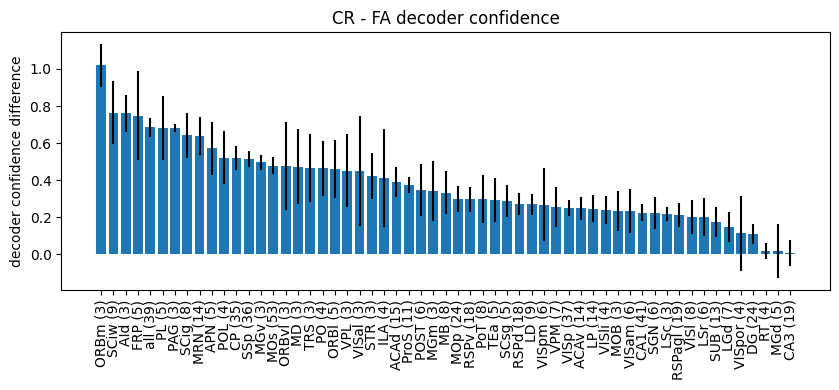

In [6]:
dprime_threshold=1.0
sel_project='DynamicRouting'
min_n_sessions=3

cr_fa_diff_by_area={
    'area':[],
    'n_sessions':[],
    'vis_context_dprime':[],
    'vis_context_cr_fa_diff':[],
    'vis_context_cr_fa_diff_sem':[],
    'aud_context_dprime':[],
    'aud_context_cr_fa_diff':[],
    'aud_context_cr_fa_diff_sem':[],
    'mean_diff':[],
    'mean_diff_sem':[],
    'total_diff':[],
}

for aa in decoder_confidence_versus_response_type['area'].unique():
    sel_area=decoder_confidence_versus_response_type.query('area==@aa and vis_context_dprime>=@dprime_threshold and aud_context_dprime>=@dprime_threshold and project.str.contains(@sel_project)')
    cr_fa_diff_by_area['area'].append(aa)
    cr_fa_diff_by_area['n_sessions'].append(len(sel_area))
    cr_fa_diff_by_area['vis_context_dprime'].append(np.mean(sel_area['vis_context_dprime']))
    cr_fa_diff_by_area['vis_context_cr_fa_diff'].append(np.mean(sel_area['vis_cr_confidence']-sel_area['vis_fa_confidence']))
    cr_fa_diff_by_area['vis_context_cr_fa_diff_sem'].append(stats.sem(sel_area['vis_cr_confidence']-sel_area['vis_fa_confidence']))
    cr_fa_diff_by_area['aud_context_dprime'].append(np.mean(sel_area['aud_context_dprime']))
    cr_fa_diff_by_area['aud_context_cr_fa_diff'].append(np.mean(sel_area['aud_cr_confidence']-sel_area['aud_fa_confidence']))
    cr_fa_diff_by_area['aud_context_cr_fa_diff_sem'].append(stats.sem(sel_area['aud_cr_confidence']-sel_area['aud_fa_confidence']))
    cr_fa_diff_by_area['mean_diff'].append(np.mean([cr_fa_diff_by_area['vis_context_cr_fa_diff'][-1],-cr_fa_diff_by_area['aud_context_cr_fa_diff'][-1]]))

    mean_diffs=(sel_area['vis_cr_confidence'].values+sel_area['aud_cr_confidence'].values)/2-(sel_area['vis_fa_confidence'].values+sel_area['aud_fa_confidence'].values)/2
    cr_fa_diff_by_area['mean_diff_sem'].append(stats.sem(mean_diffs))

    cr_fa_diff_by_area['total_diff'].append(np.sum([np.abs(cr_fa_diff_by_area['vis_context_cr_fa_diff'][-1]),np.abs(cr_fa_diff_by_area['aud_context_cr_fa_diff'][-1])]))


cr_fa_diff_by_area=pd.DataFrame(cr_fa_diff_by_area)

plot_data=cr_fa_diff_by_area.query('n_sessions>=@min_n_sessions').sort_values(by='mean_diff',ascending=False)

fig,ax=plt.subplots(figsize=(8.5,4))
ax.bar(plot_data['area'],plot_data['mean_diff'],yerr=plot_data['mean_diff_sem'])
# ax.bar(plot_data['area'],plot_data['vis_context_cr_fa_diff'])#,yerr=[plot_data['vis_context_cr_fa_diff_sem']])
# ax.bar(plot_data['area'],-plot_data['aud_context_cr_fa_diff'],bottom=plot_data['vis_context_cr_fa_diff'])#,yerr=[plot_data['aud_context_cr_fa_diff_sem']])
# plot_data.plot.bar(x='area',y='vis_context_cr_fa_diff',yerr=plot_data['vis_context_cr_fa_diff_sem'],ax=ax)

area_labels=[]
for i in range(plot_data.shape[0]):
    area_labels.append(plot_data['area'].iloc[i]+' ('+str(plot_data['n_sessions'].iloc[i])+')')
ax.set_xticks(np.arange(len(plot_data)))
ax.set_xticklabels(area_labels,rotation=90,ha='center')
ax.set_ylabel('decoder confidence difference')

ax.set_title('CR - FA decoder confidence')

# ax.legend(['vis context','aud context'])

fig.tight_layout()


C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_40052\711082734.py:12: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(1,1)


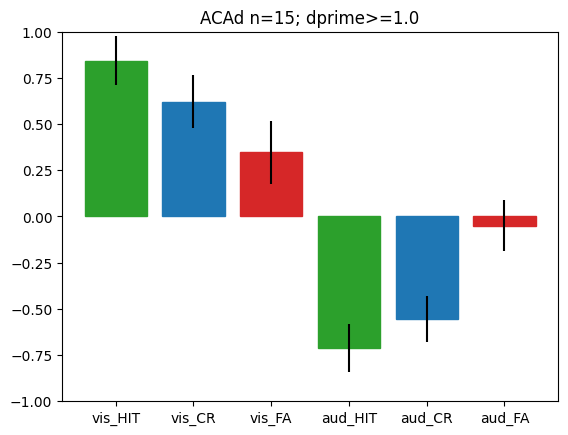

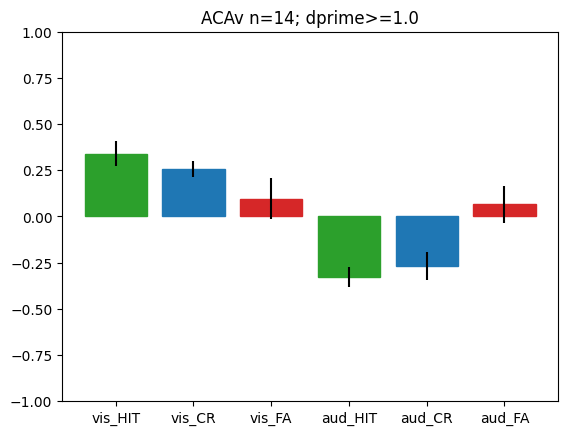

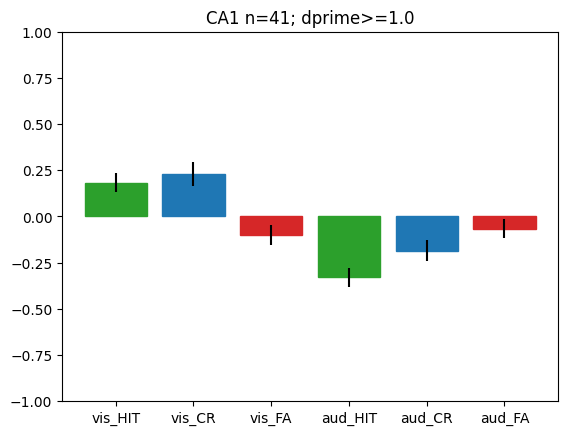

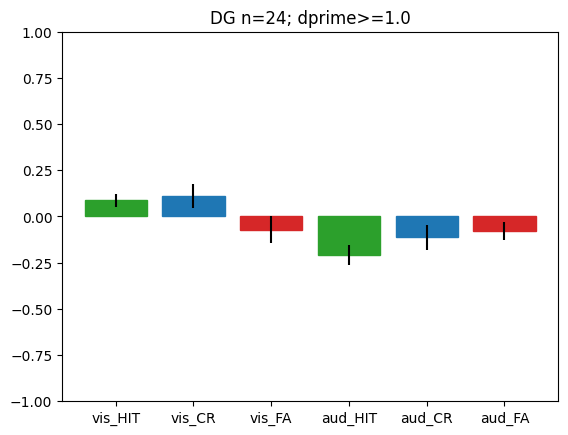

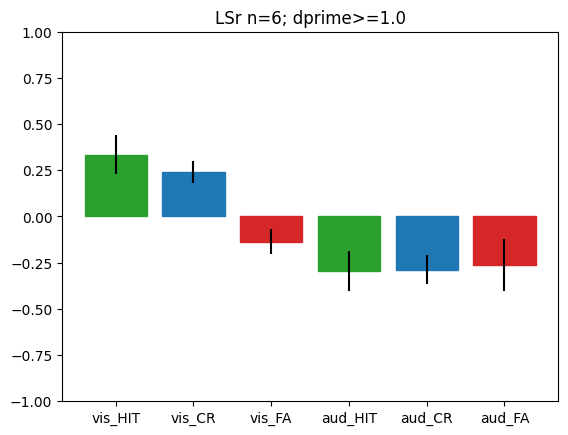

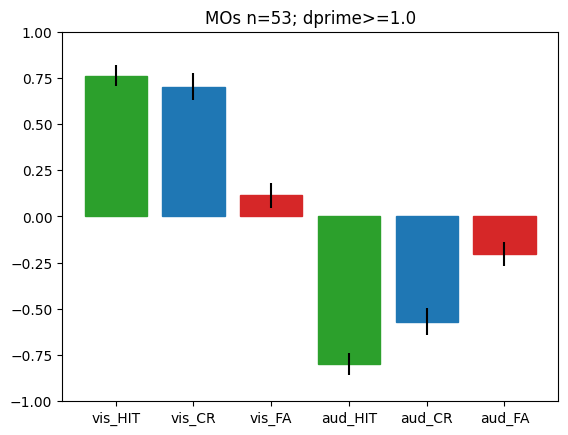

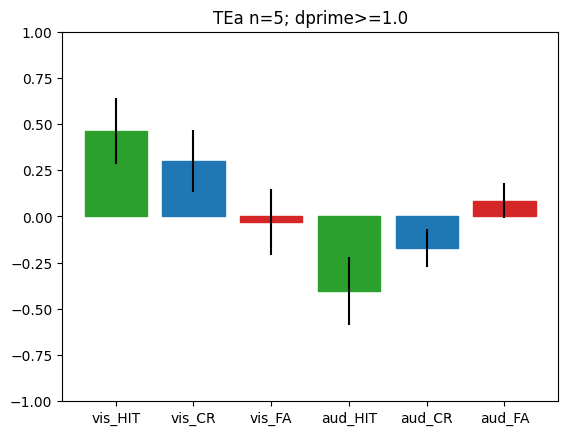

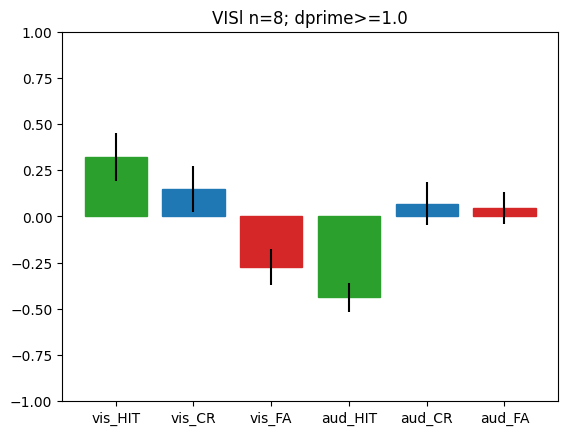

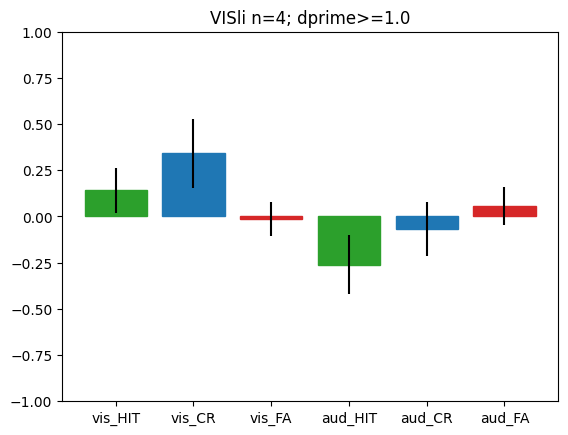

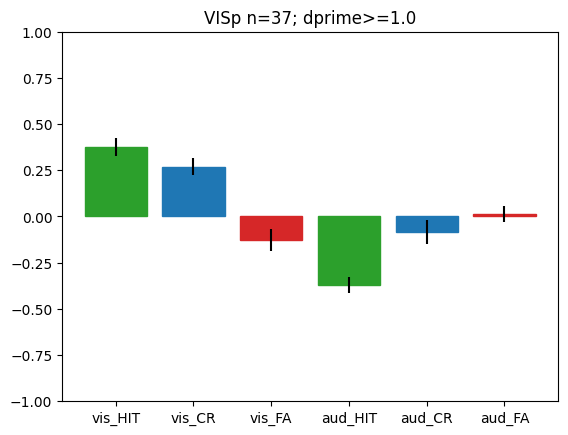

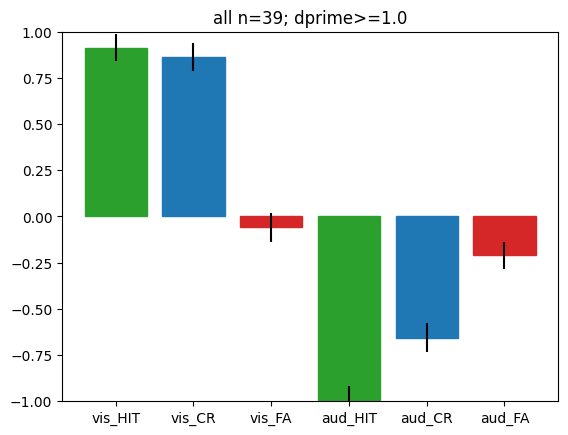

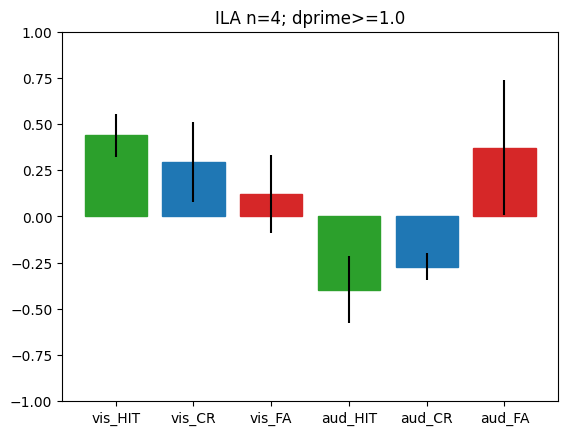

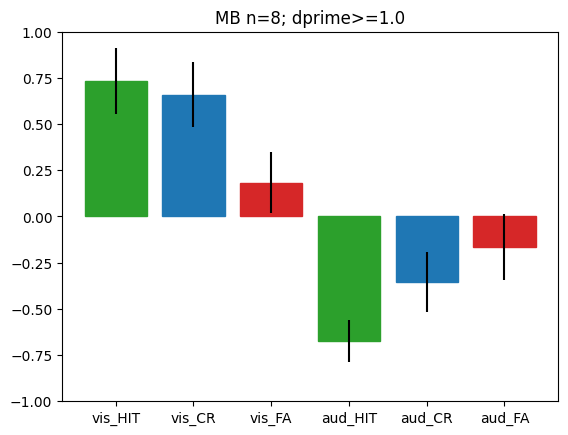

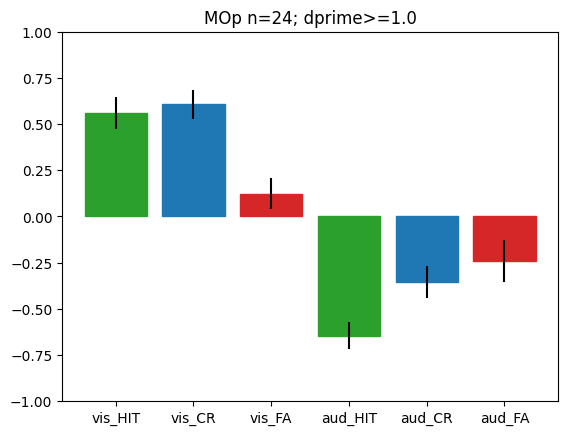

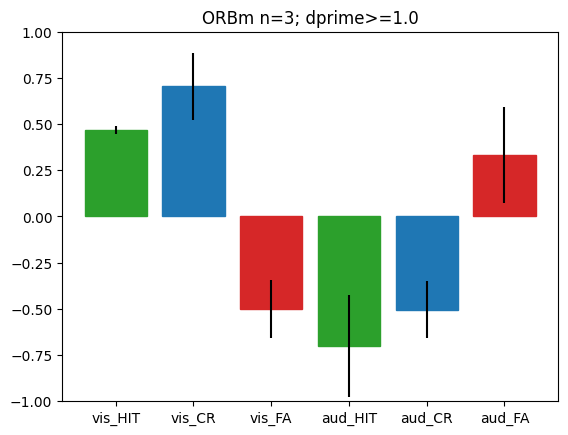

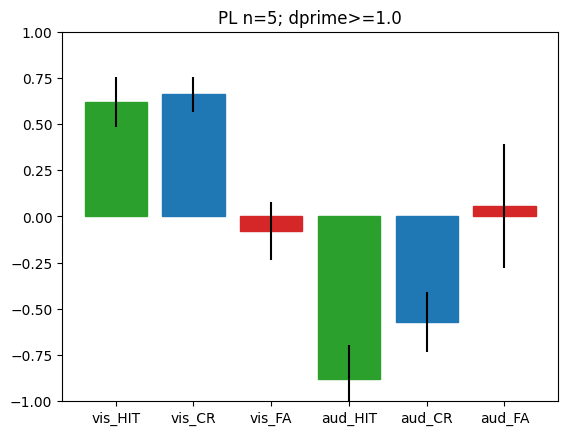

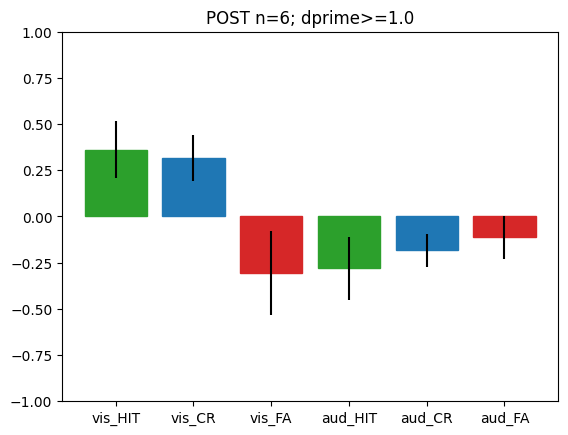

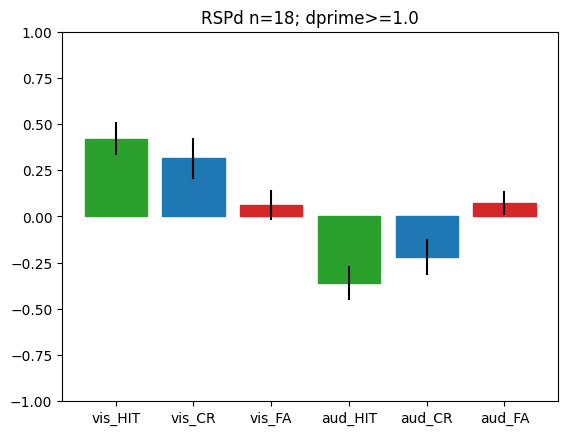

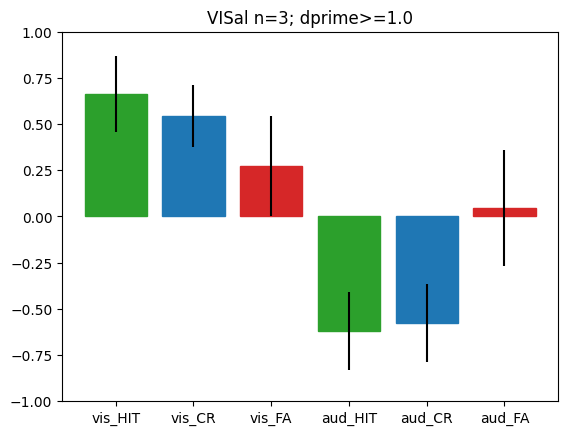

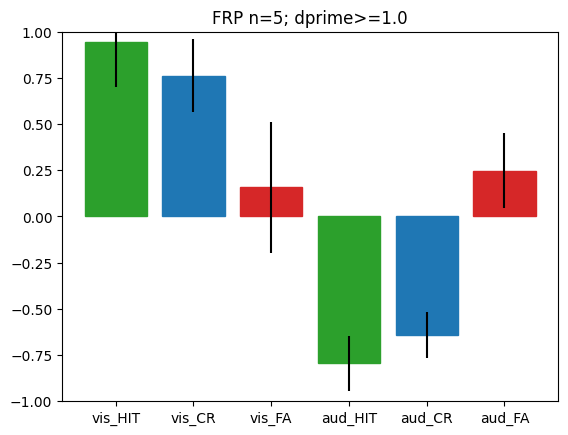

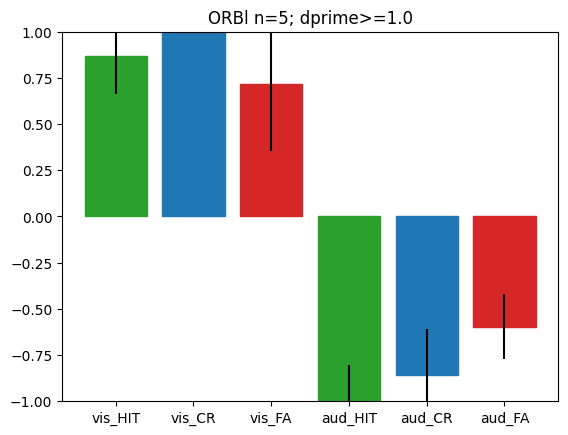

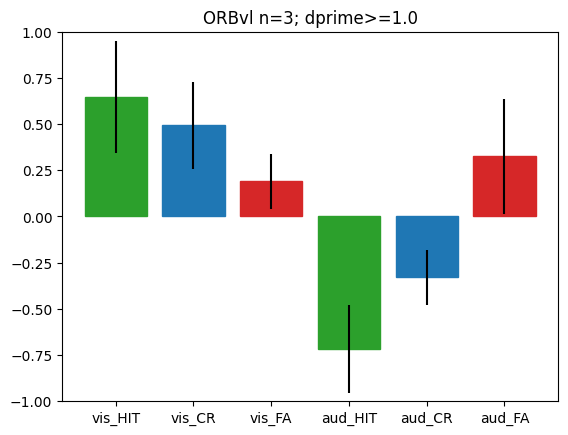

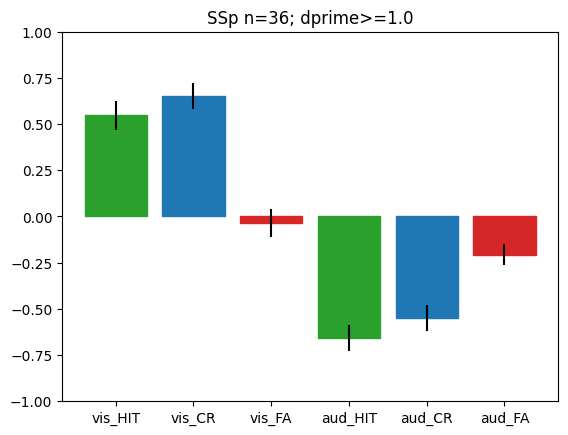

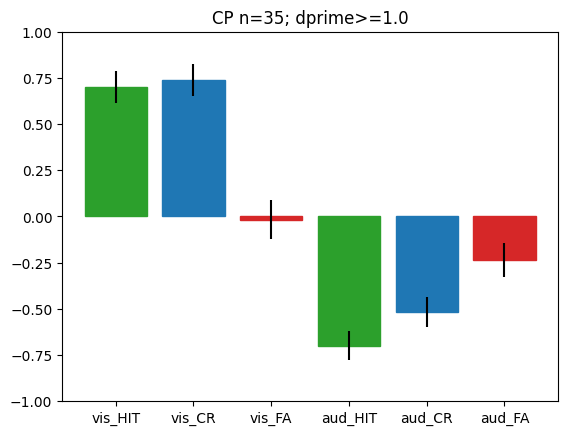

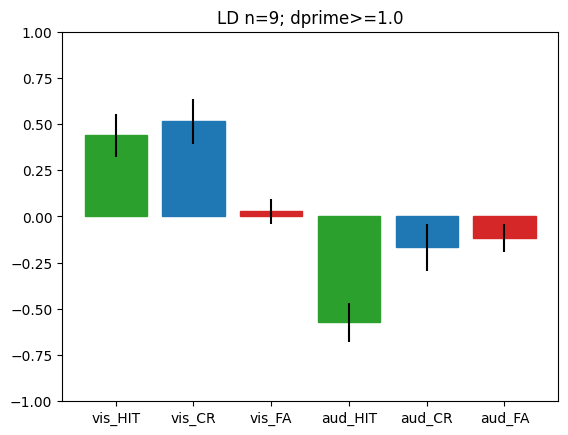

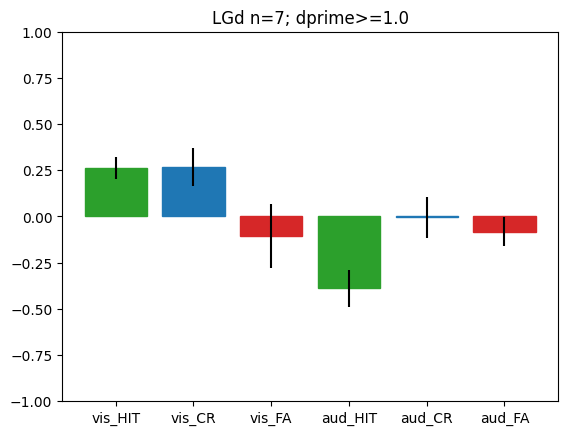

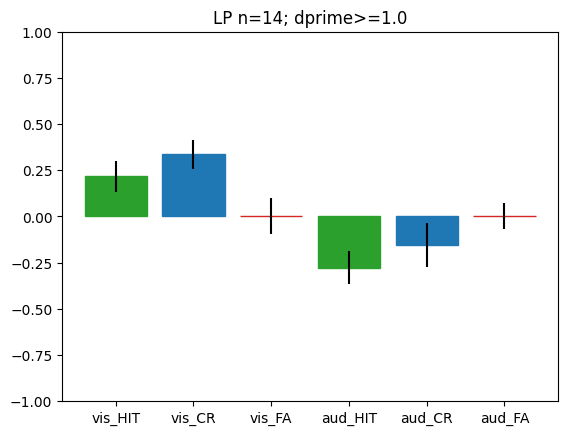

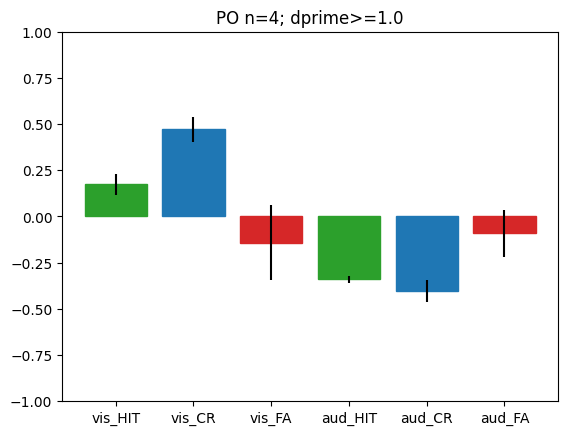

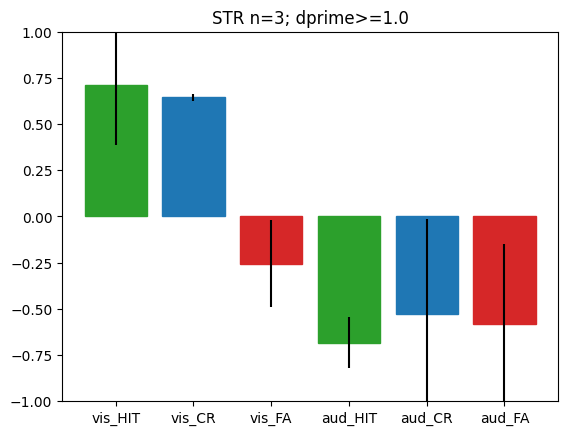

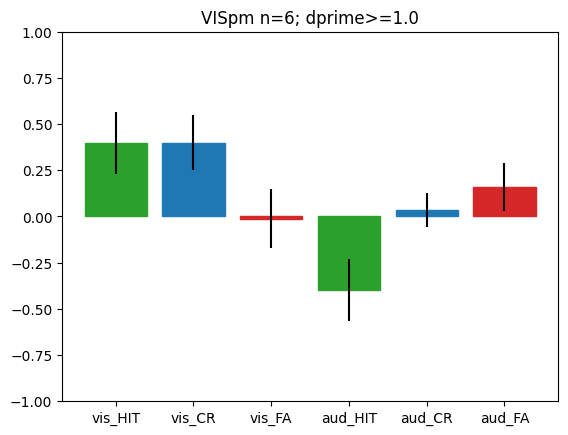

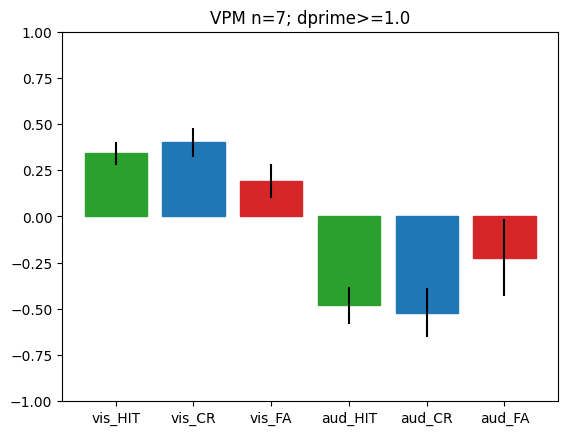

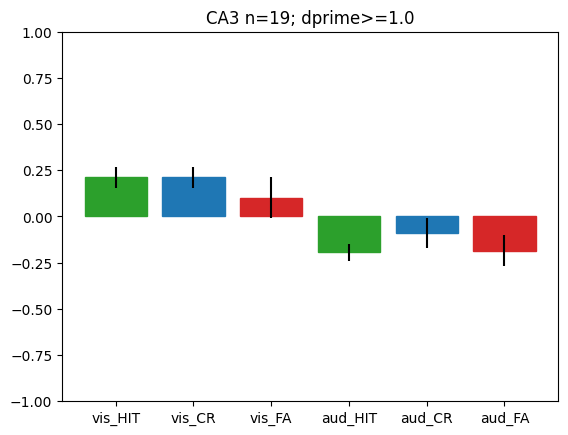

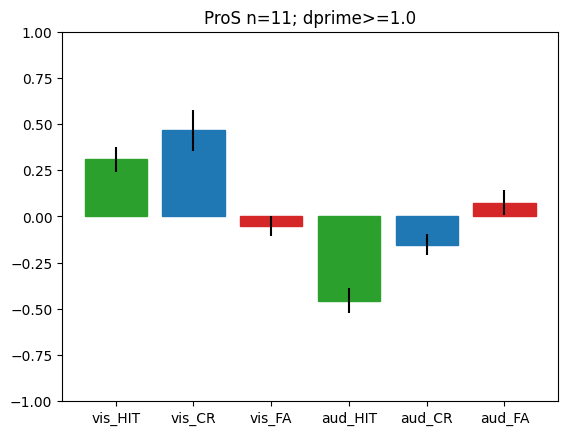

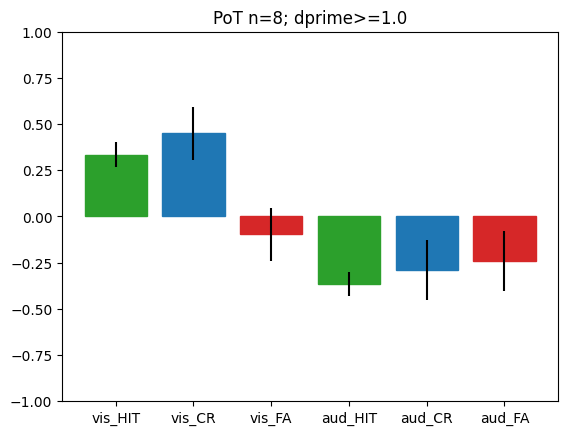

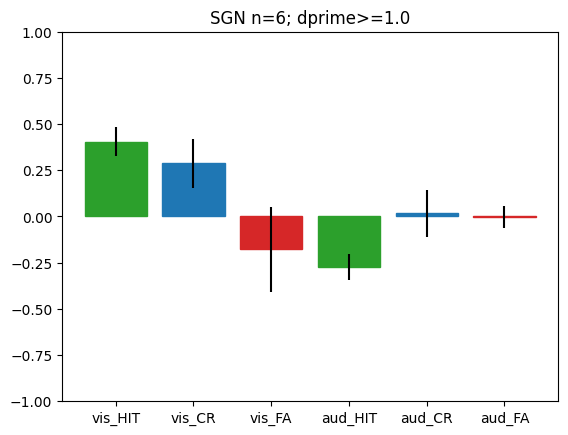

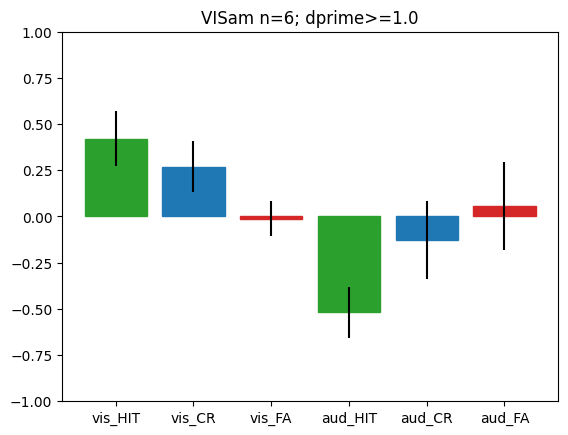

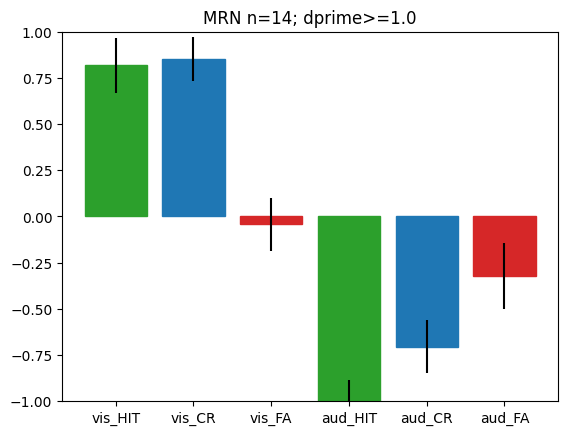

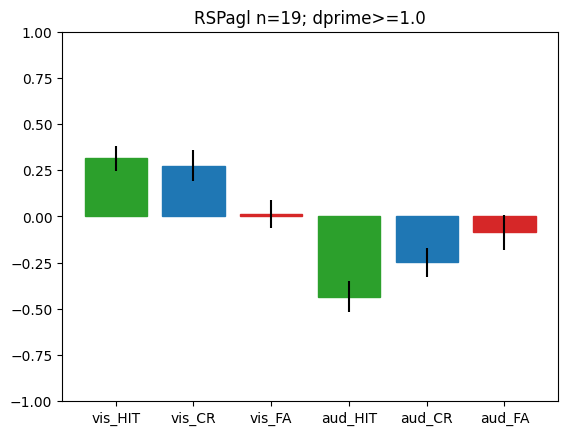

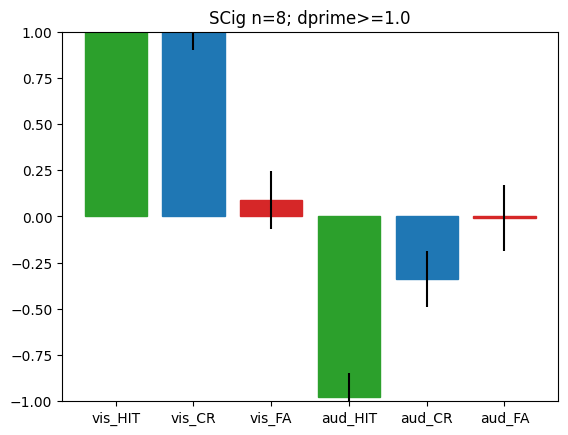

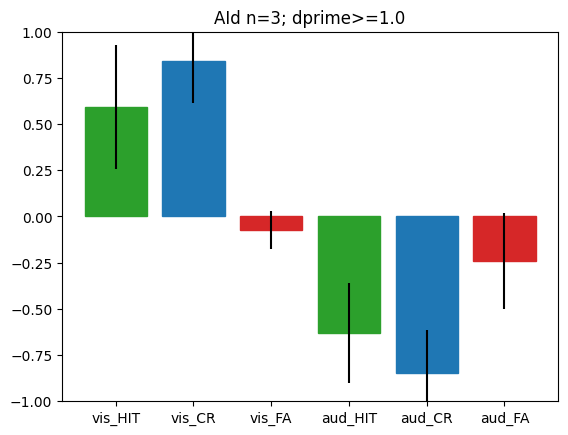

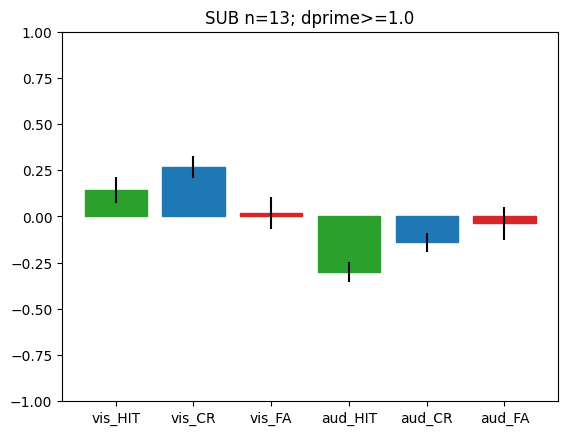

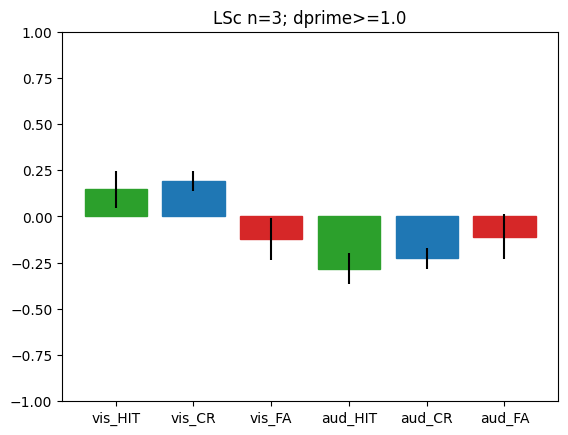

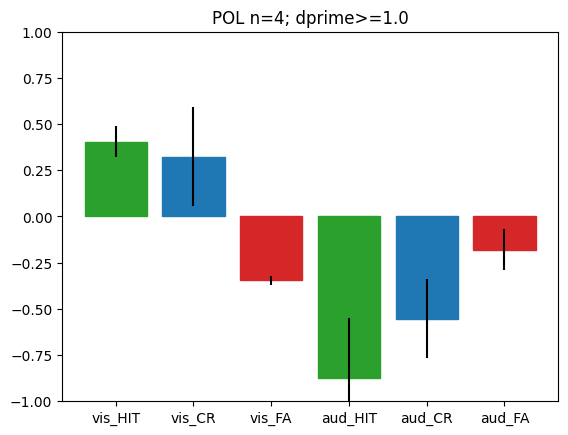

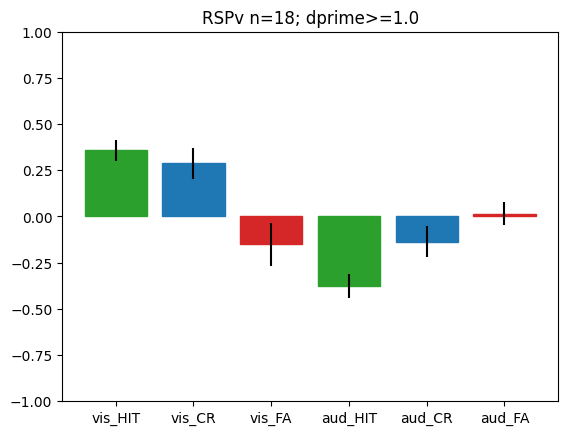

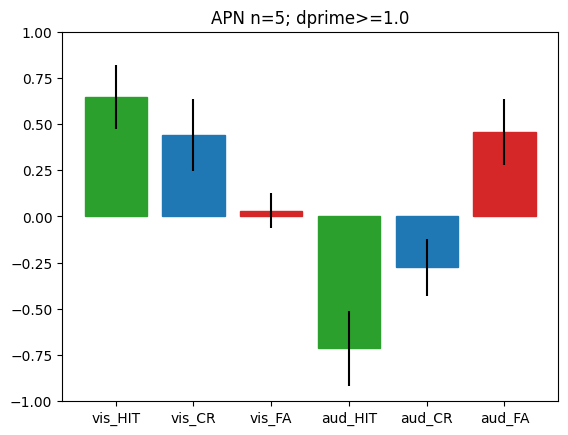

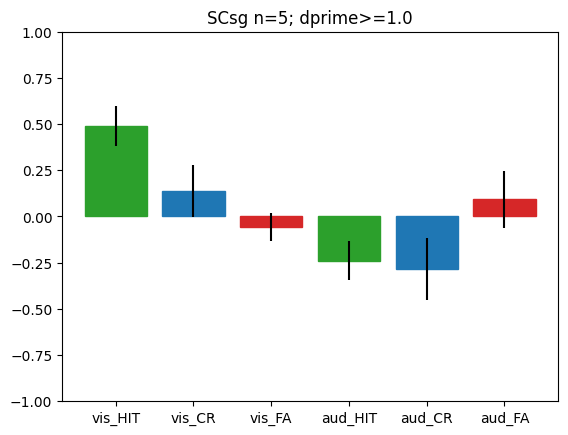

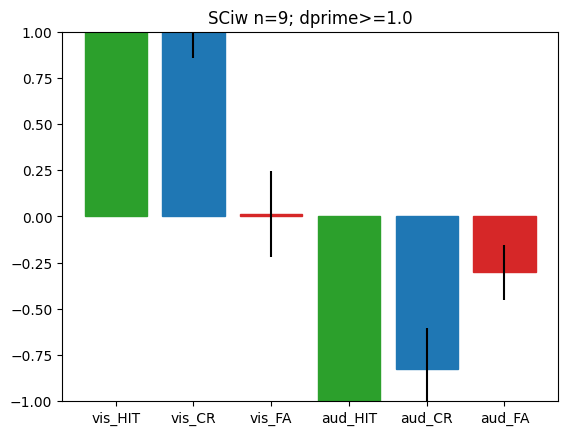

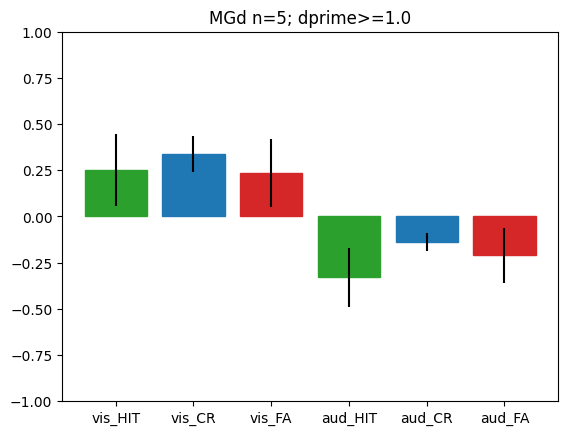

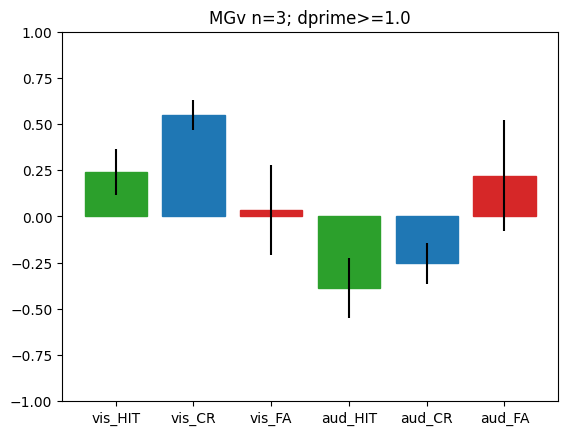

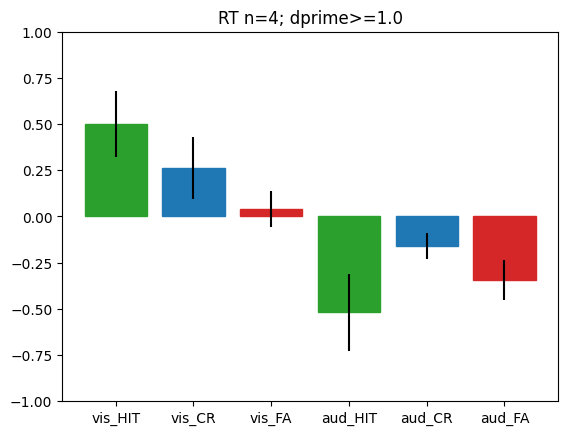

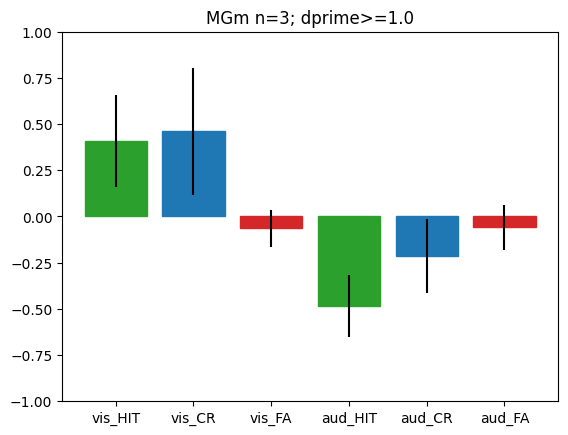

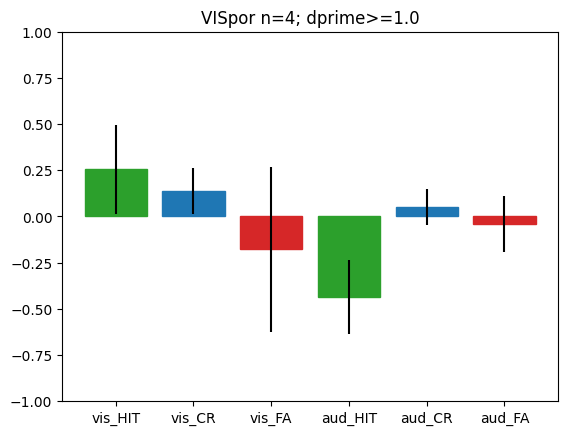

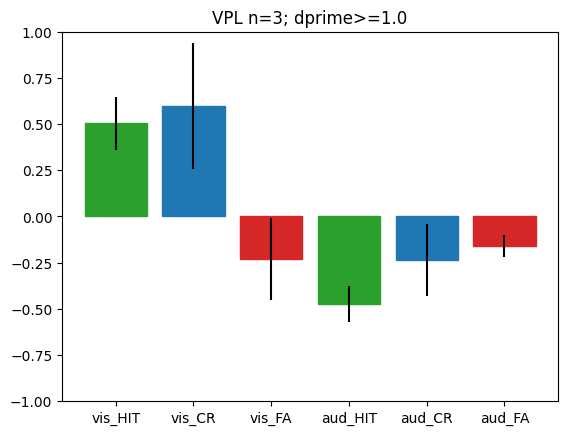

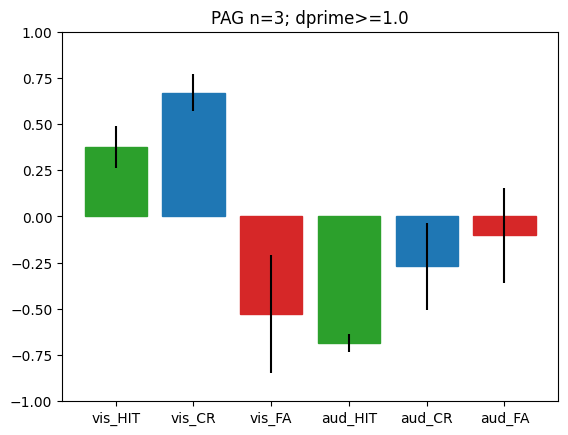

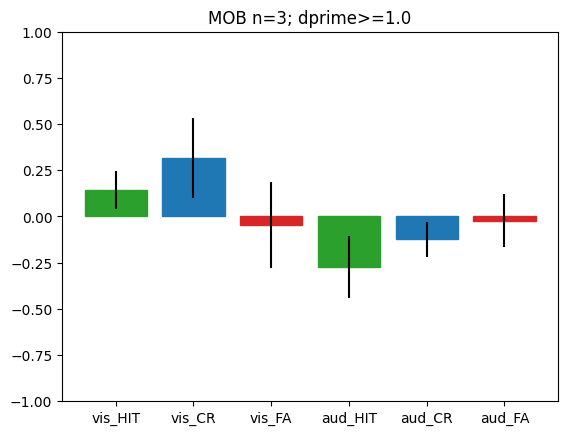

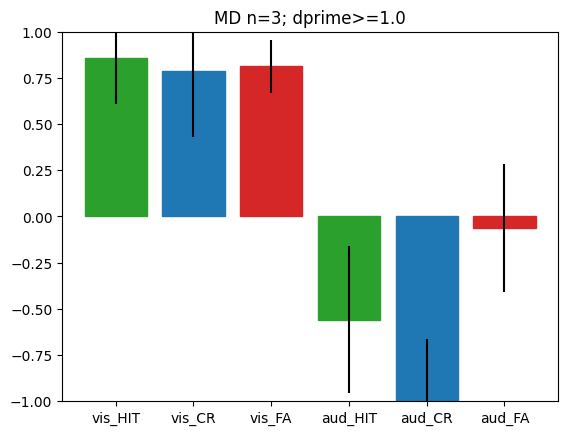

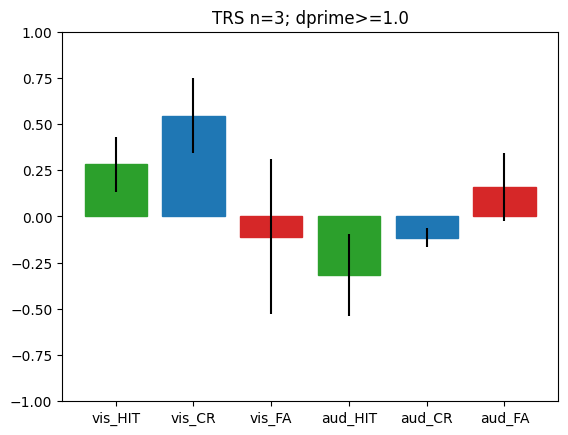

In [18]:
dprime_threshold=1.0
sel_project='DynamicRouting'
min_n_recs=3
for aa in decoder_confidence_versus_response_type['area'].unique():
    # aa='ORBl'
    if type(aa)==str and 'probe' in aa:
        continue
    sel_area=decoder_confidence_versus_response_type.query('area==@aa and vis_context_dprime>=@dprime_threshold and aud_context_dprime>=@dprime_threshold and project.str.contains(@sel_project)')
    if len(sel_area)<min_n_recs:
        continue

    fig,ax=plt.subplots(1,1)
    bars=ax.bar([0,1,2,3,4,5],sel_area[['vis_hit_confidence','vis_cr_confidence','vis_fa_confidence','aud_hit_confidence','aud_cr_confidence','aud_fa_confidence']].mean().values)
    ax.errorbar([0,1,2,3,4,5],sel_area[['vis_hit_confidence','vis_cr_confidence','vis_fa_confidence','aud_hit_confidence','aud_cr_confidence','aud_fa_confidence']].mean().values,
                yerr=sel_area[['vis_hit_confidence','vis_cr_confidence','vis_fa_confidence','aud_hit_confidence','aud_cr_confidence','aud_fa_confidence']].sem().values,linestyle='',color='k')
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels(['vis_HIT','vis_CR','vis_FA','aud_HIT','aud_CR','aud_FA'])
    bars[0].set_color('tab:green')
    bars[1].set_color('tab:blue')
    bars[2].set_color('tab:red')
    bars[3].set_color('tab:green')
    bars[4].set_color('tab:blue')
    bars[5].set_color('tab:red')
    ax.set_title(str(aa)+' n='+str(len(sel_area))+'; dprime>='+str(dprime_threshold))
    ax.set_ylim([-1,1])

In [ ]:
decoder_confidence_dprime_by_block

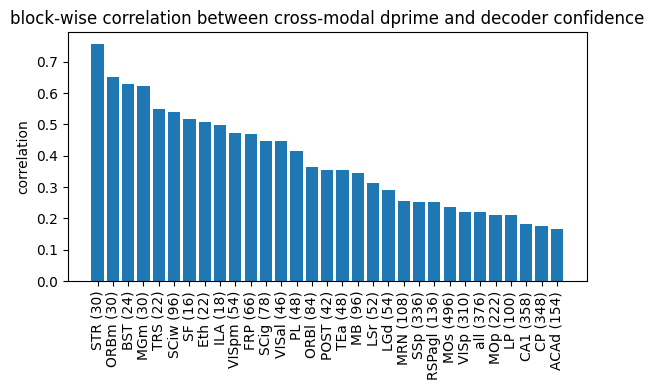

In [42]:
min_n_blocks=13
#plot correlation by area
corr_by_area={
    'area':[],
    'n_blocks':[],
    'r':[],
    'p':[],
}

for aa in decoder_confidence_dprime_by_block['area'].unique():
    sel_area=decoder_confidence_dprime_by_block.query('area==@aa and cross_modal_dprime.isna()==False and confidence.isna()==False and project.str.contains(@sel_project)')
    if len(sel_area)==0:
        continue
    correlation=stats.pearsonr(sel_area['cross_modal_dprime'],sel_area['confidence'])

    corr_by_area['area'].append(aa)
    corr_by_area['n_blocks'].append(len(sel_area))
    corr_by_area['r'].append(correlation[0])
    corr_by_area['p'].append(correlation[1])

corr_by_area=pd.DataFrame(corr_by_area)

fig,ax=plt.subplots(figsize=(6,4))

plot_data=corr_by_area.query('n_blocks>=@min_n_blocks and p<0.05').sort_values(by='r',ascending=False)

ax.bar(plot_data['area'],plot_data['r'])
area_labels=[]
for i in range(plot_data.shape[0]):
    area_labels.append(plot_data['area'].iloc[i]+' ('+str(plot_data['n_blocks'].iloc[i])+')')
ax.set_xticks(np.arange(len(plot_data)))
ax.set_xticklabels(area_labels,rotation=90,ha='center')
ax.set_ylabel('correlation')
ax.set_title('block-wise correlation between cross-modal dprime and decoder confidence')

fig.tight_layout()

In [ ]:
#plot correlation between dprime and confidence by block
for aa in decoder_confidence_dprime_by_block['area'].unique():

    if type(aa)==str and 'probe' in aa:
        continue
    
    sel_area=decoder_confidence_dprime_by_block.query('area==@aa and cross_modal_dprime.isna()==False and confidence.isna()==False and project.str.contains(@sel_project)')

    if len(sel_area)<min_n_recs:
        continue

    #compute correlation
    correlation=stats.pearsonr(sel_area['cross_modal_dprime'],sel_area['confidence'])

    fig,ax=plt.subplots(1,1)
    ax.scatter(sel_area['cross_modal_dprime'],sel_area['confidence'])
    ax.set_xlabel('dprime')
    ax.set_ylabel('confidence')
    ax.set_title(str(aa)+' n='+str(len(sel_area))+' r='+str(np.round(correlation[0],decimals=3))+' p='+str(np.round(correlation[1],decimals=4)))

In [39]:
decoder_confidence_by_switch

session   area         project  switch_trial  block  \
0     626791_2022-08-15_0   AUDp  DynamicRouting           115      2   
1     626791_2022-08-15_0   AUDp  DynamicRouting           201      3   
2     626791_2022-08-15_0   AUDp  DynamicRouting           273      4   
3     626791_2022-08-15_0   AUDp  DynamicRouting           360      5   
4     626791_2022-08-15_0  AUDpo  DynamicRouting           115      2   
...                   ...    ...             ...           ...    ...   
4379  703333_2024-04-08_0   SCig  DynamicRouting           224      5   
4380  703333_2024-04-08_0    all  DynamicRouting            94      2   
4381  703333_2024-04-08_0    all  DynamicRouting           131      3   
4382  703333_2024-04-08_0    all  DynamicRouting           192      4   
4383  703333_2024-04-08_0    all  DynamicRouting           224      5   

      dprime_before  dprime_after  \
0          1.991225      1.373955   
1          1.373955      0.000000   
2          0.000000      1.774796   
3          1.774796      2.112518   
4          1.991225      1.373955   
...             ...           ...   
4379      -0.183682      0.131202   
4380       0.024996      0.068887   
4381       0.068887      0.307628   
4382       0.307628     -0.183682   
4383      -0.183682      0.131202   

                                             confidence  
0     [-1.3527577394572192, 2.242817290267333, 0.440...  
1     [0.873118769505173, -0.16491322037554224, -1.3...  
2     [-0.2341170288677673, -1.0503335620174796, -0....  
3     [0.25242833261762254, 0.36073293974993814, -1....  
4     [0.7690639037916205, -0.06251413919725052, -1....  
...                                                 ...  
4379  [-0.5811259631453279, 0.1802471563130246, -1.7...  
4380  [0.038140870668790905, 0.7581473474304306, 0.1...  
4381  [0.4912815168449168, -0.28035030392554905, 0.2...  
4382  [-1.0442873411141136, 0.6693906001218903, -0.0...  
4383  [0.6148836336932588, -0.8688952606350716, -0.2...  

[4384 rows x 8 columns]

In [ ]:
# switch['confidence'][np.arange(0,pre_switch_ind)].mean()
# pre_switch_confidence
# post_switch_confidence
switch['confidence'][pre_switch_ind]

C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_40052\771373197.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pre_switch_confidence.append(np.nanmean(switch['confidence'][np.arange(0,pre_switch_ind)]))
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_40052\771373197.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pre_switch_confidence.append(np.nanmean(switch['confidence'][np.arange(0,pre_switch_ind)]))
C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_40052\771373197.py:30: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element

Text(0.5, 1.0, 'change in confidence after second trial of switch')

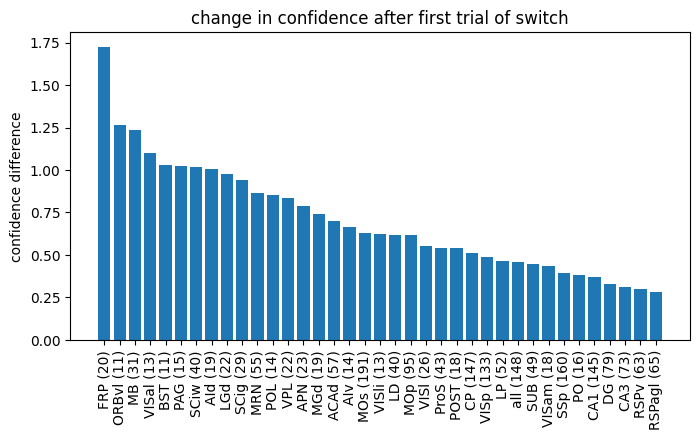

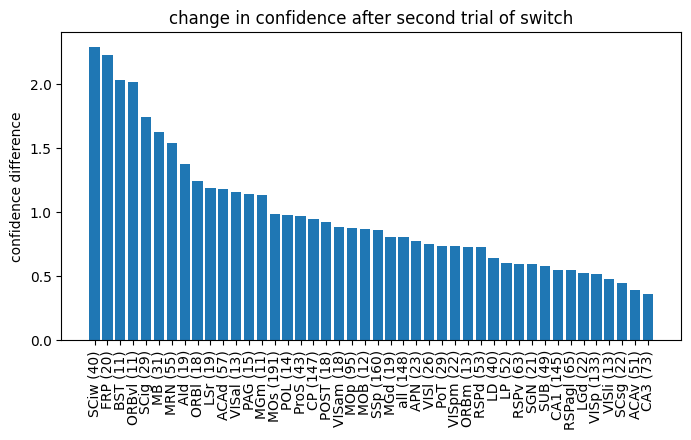

In [32]:
#plot diff btwn trial 0 and 1 by area
xvect=np.arange(-20,30)
pre_switch_ind=np.where(xvect==0)[0]
post_switch_ind=np.where(xvect==1)[0]
min_dprime=1.0

min_n_switches=10

switch_changes={
    'area':[],
    'n_switches':[],
    'pre_switch_confidence':[],
    'post_switch_confidence':[],
    'post_switch_plus_one_confidence':[],
    'diff':[],
    'p':[],
    'plus_one_diff':[],
    'plus_one_diff_p':[],
}

for aa in decoder_confidence_by_switch['area'].unique():
    sel_area=decoder_confidence_by_switch.query('area==@aa and project.str.contains(@sel_project) and dprime_before>=@min_dprime and dprime_after>=@min_dprime')
    if len(sel_area)==0:
        continue
    pre_switch_confidence=[]
    post_switch_confidence=[]
    post_switch_plus_one_confidence=[]
    for ss,switch in sel_area.iterrows():
        # pre_switch_confidence.append(switch['confidence'][pre_switch_ind])
        pre_switch_confidence.append(np.nanmean(switch['confidence'][np.arange(0,pre_switch_ind)]))
        post_switch_confidence.append(switch['confidence'][post_switch_ind][0])
        post_switch_plus_one_confidence.append(switch['confidence'][post_switch_ind+1][0])
    
    pre_switch_confidence=np.asarray(pre_switch_confidence)
    post_switch_confidence=np.asarray(post_switch_confidence)
    post_switch_plus_one_confidence=np.asarray(post_switch_plus_one_confidence)
    
    switch_changes['area'].append(aa)
    switch_changes['n_switches'].append(len(sel_area))
    switch_changes['pre_switch_confidence'].append(pre_switch_confidence)
    switch_changes['post_switch_confidence'].append(post_switch_confidence)
    switch_changes['post_switch_plus_one_confidence'].append(post_switch_plus_one_confidence)
    switch_changes['diff'].append(np.nanmean(post_switch_confidence-pre_switch_confidence))
    switch_changes['p'].append(stats.wilcoxon(pre_switch_confidence,post_switch_confidence)[1])
    switch_changes['plus_one_diff'].append(np.nanmean(post_switch_plus_one_confidence-pre_switch_confidence))
    switch_changes['plus_one_diff_p'].append(stats.wilcoxon(pre_switch_confidence,post_switch_plus_one_confidence)[1])


switch_changes=pd.DataFrame(switch_changes)

plot_data=switch_changes.query('n_switches>=@min_n_switches and p<0.05').sort_values(by='diff',ascending=False)

fig,ax=plt.subplots(figsize=(8,4))
ax.bar(plot_data['area'],plot_data['diff'])
area_labels=[]
for i in range(plot_data.shape[0]):
    area_labels.append(plot_data['area'].iloc[i]+' ('+str(plot_data['n_switches'].iloc[i])+')')
ax.set_xticks(np.arange(len(plot_data)))
ax.set_xticklabels(area_labels,rotation=90,ha='center')

ax.set_ylabel('confidence difference')
ax.set_title('change in confidence after first trial of switch')

plot_data=switch_changes.query('n_switches>=@min_n_switches and plus_one_diff_p<0.05').sort_values(by='plus_one_diff',ascending=False)

fig,ax=plt.subplots(figsize=(8,4))
ax.bar(plot_data['area'],plot_data['plus_one_diff'])
area_labels=[]
for i in range(plot_data.shape[0]):
    area_labels.append(plot_data['area'].iloc[i]+' ('+str(plot_data['n_switches'].iloc[i])+')')
ax.set_xticks(np.arange(len(plot_data)))
ax.set_xticklabels(area_labels,rotation=90,ha='center')

ax.set_ylabel('confidence difference')
ax.set_title('change in confidence after second trial of switch')


C:\Users\ethan.mcbride\AppData\Local\Temp\ipykernel_40052\2573049183.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,ax=plt.subplots(1,1)


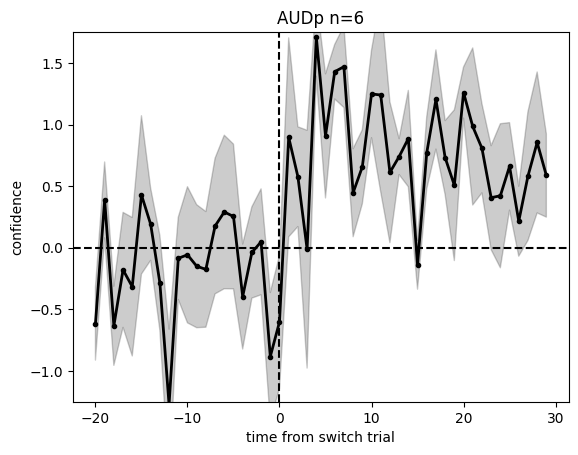

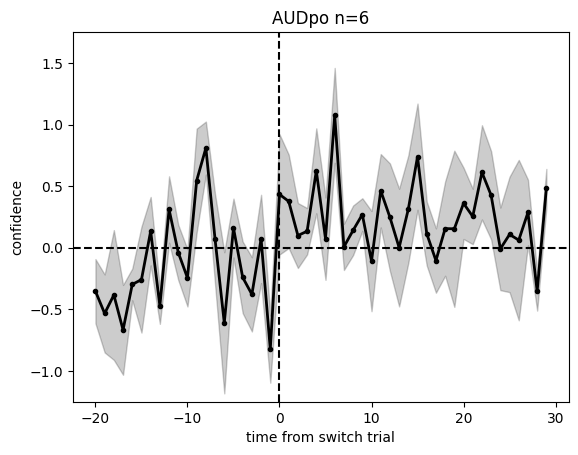

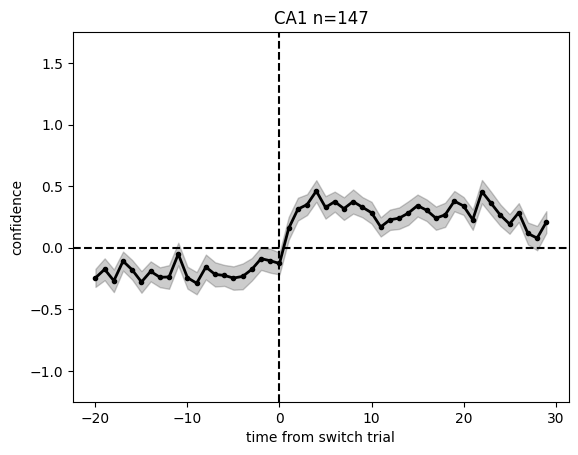

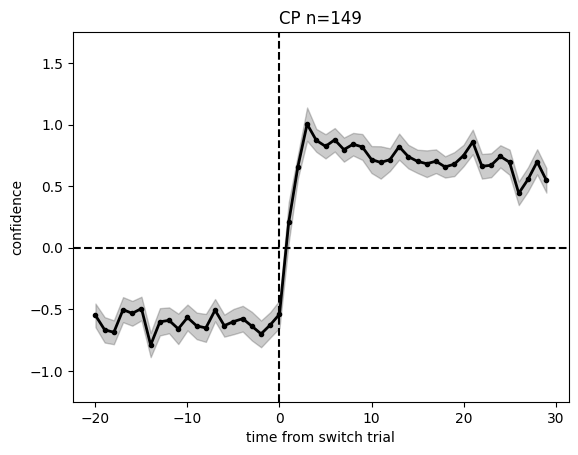

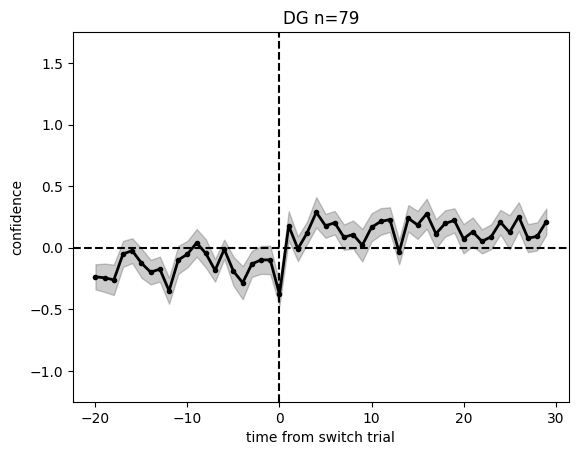

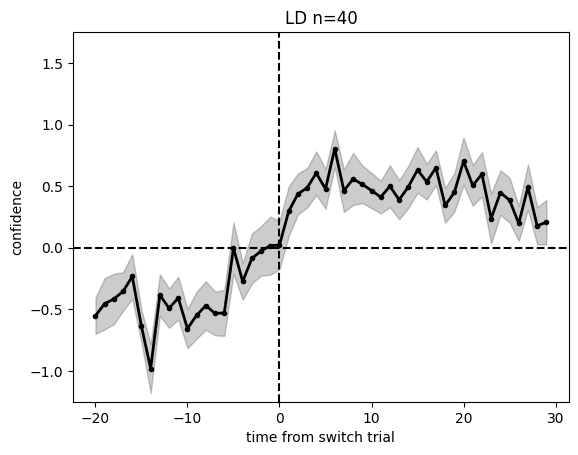

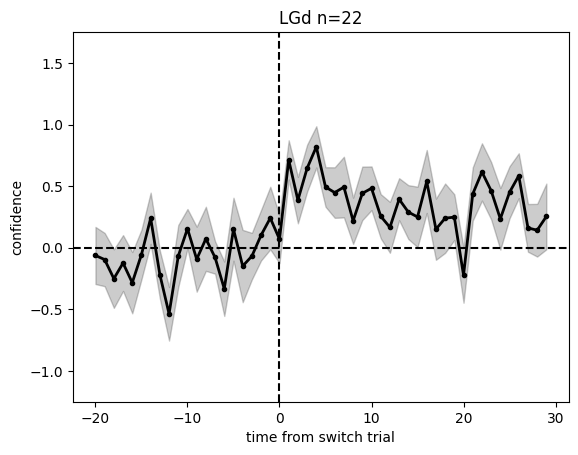

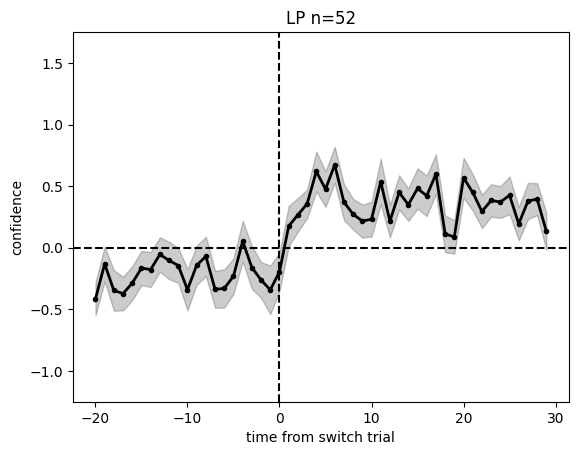

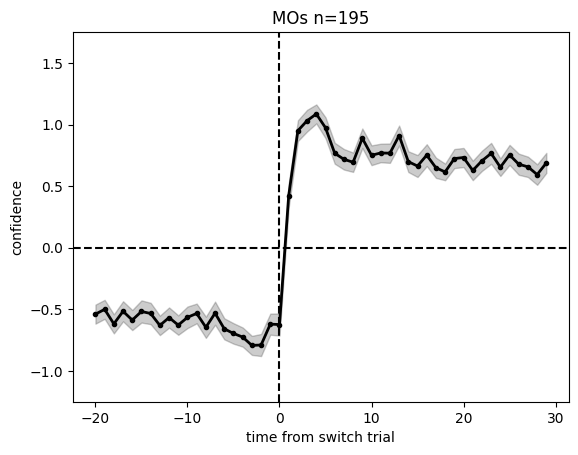

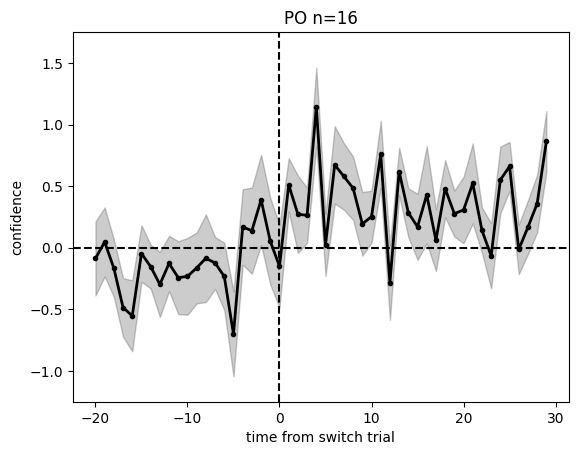

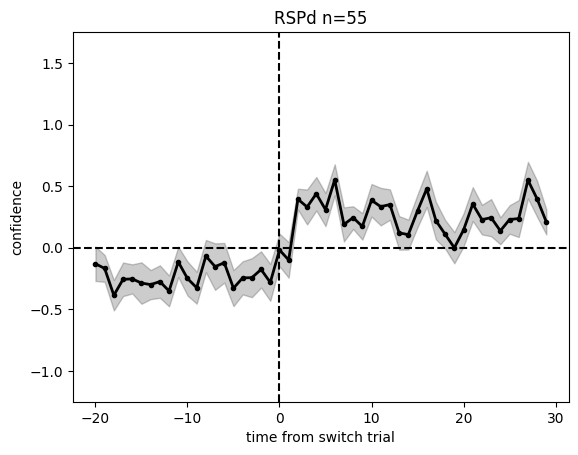

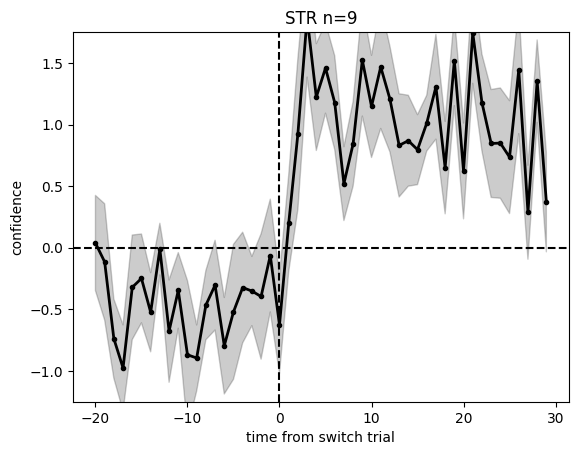

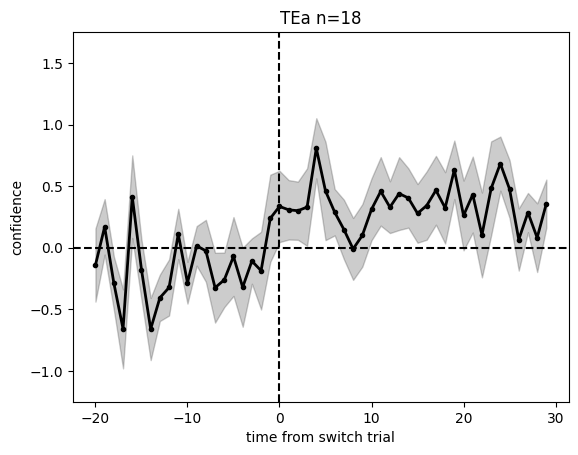

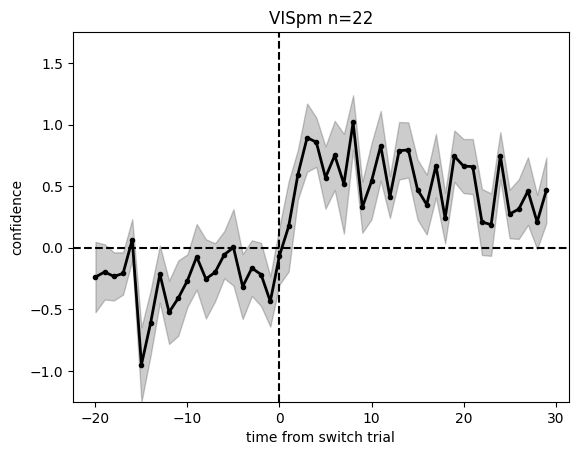

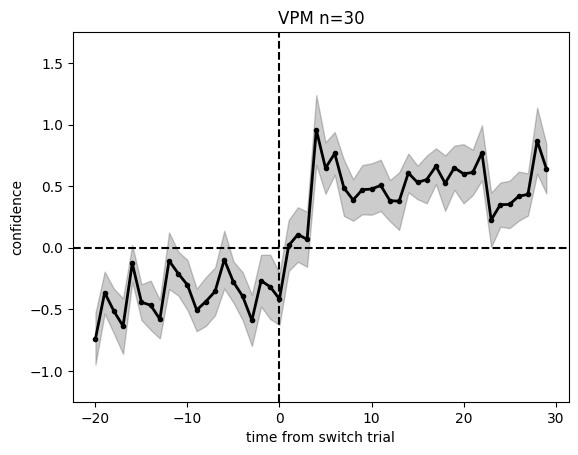

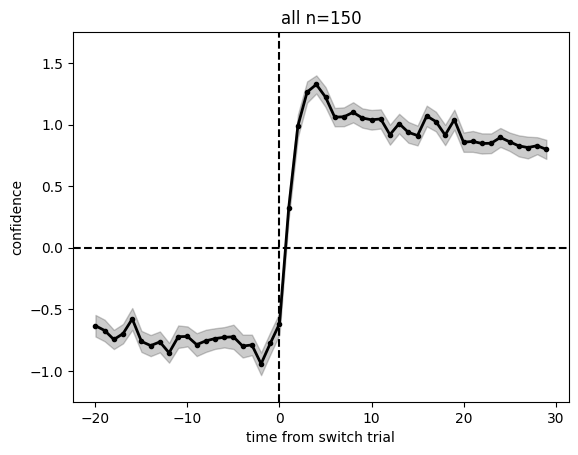

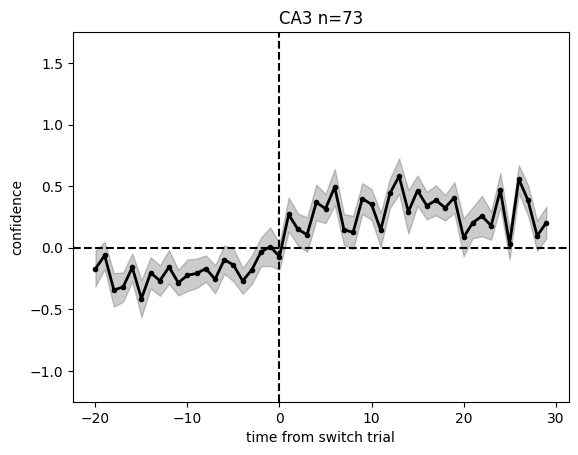

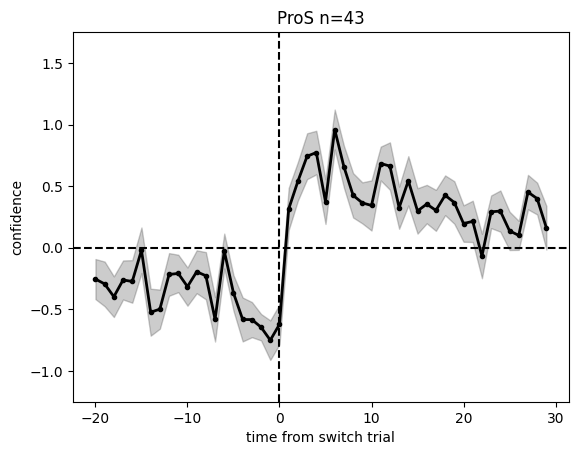

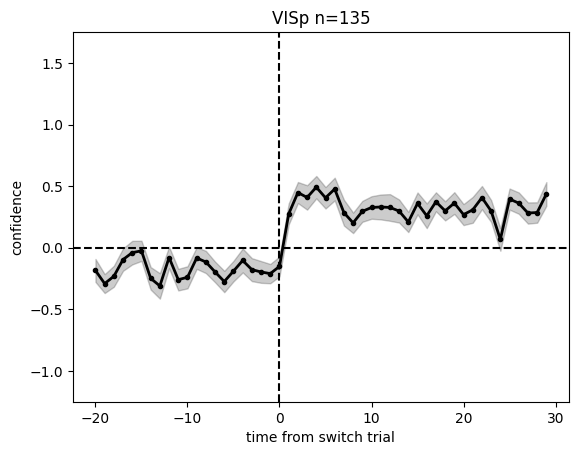

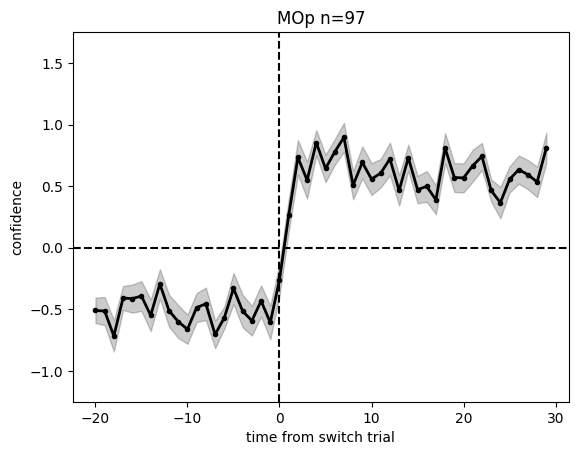

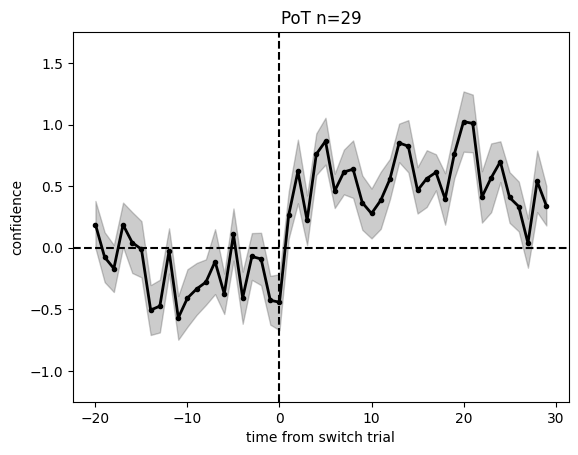

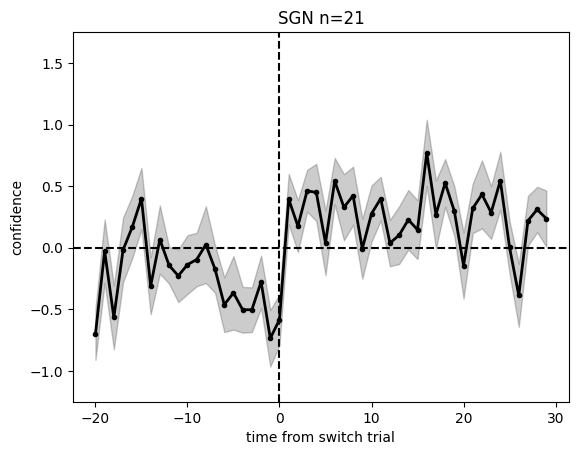

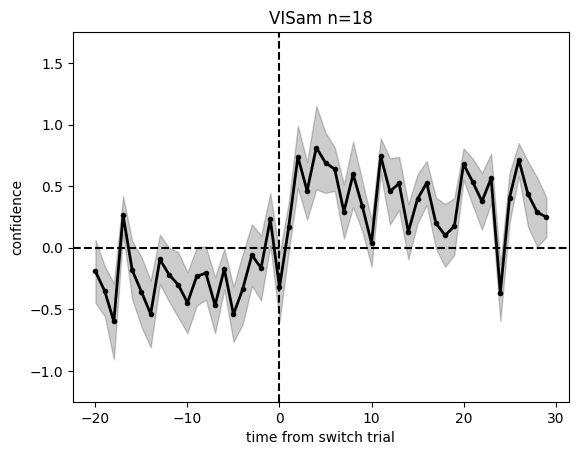

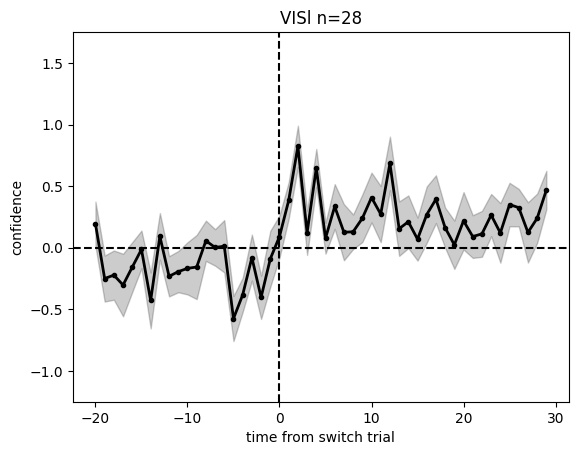

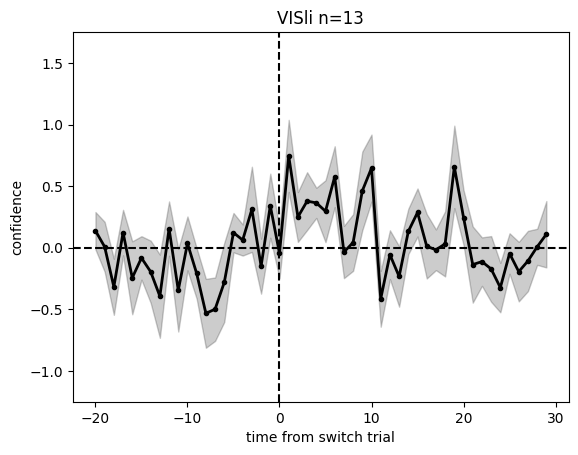

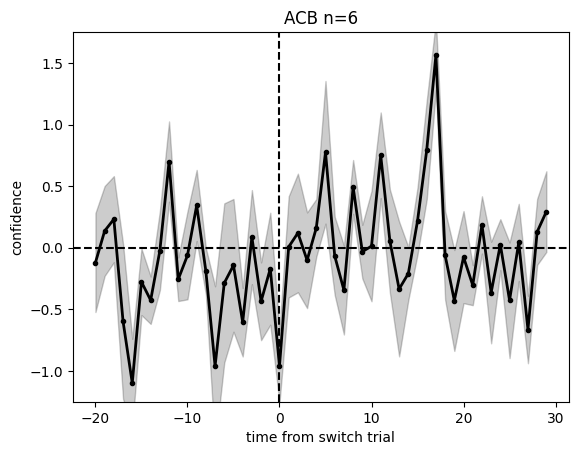

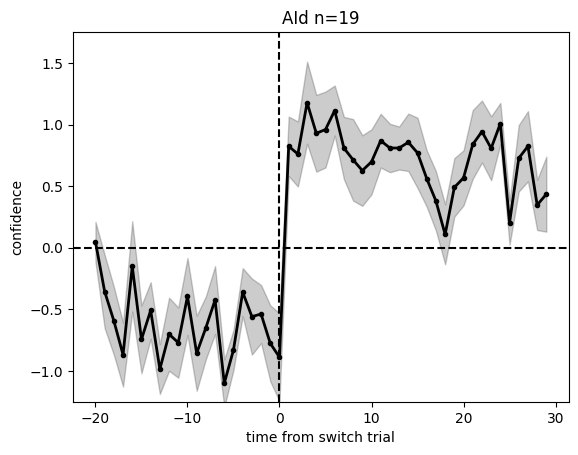

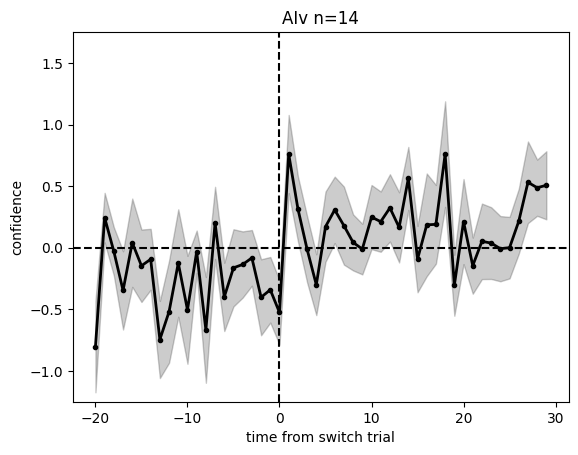

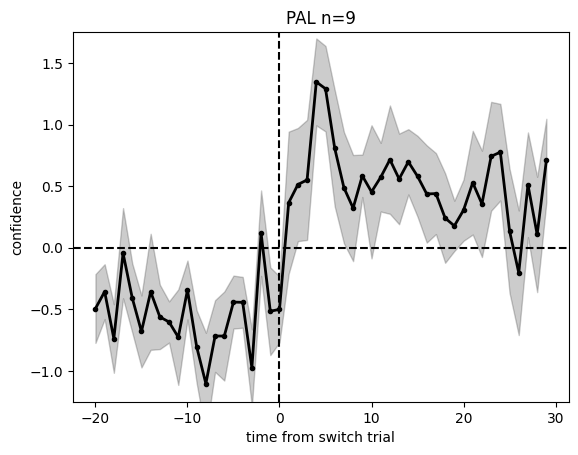

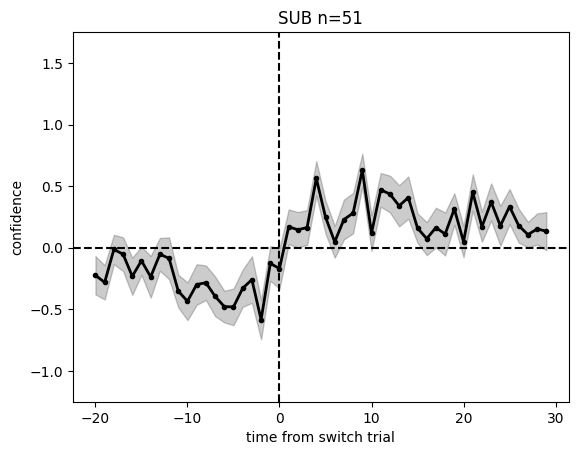

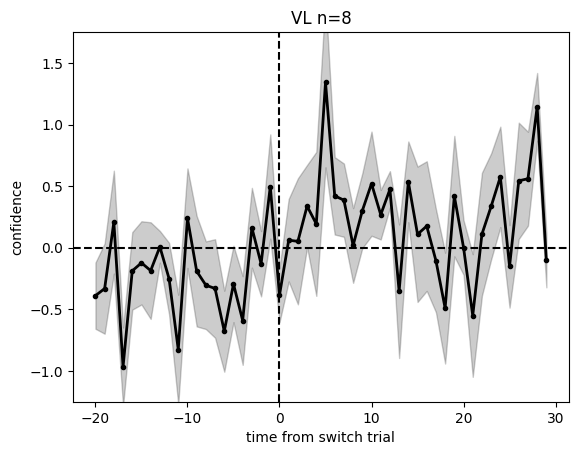

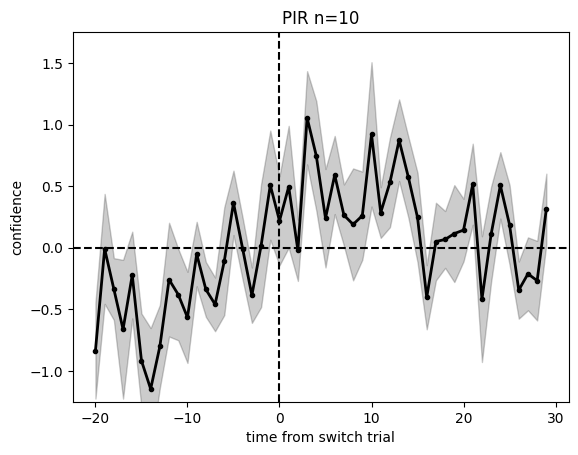

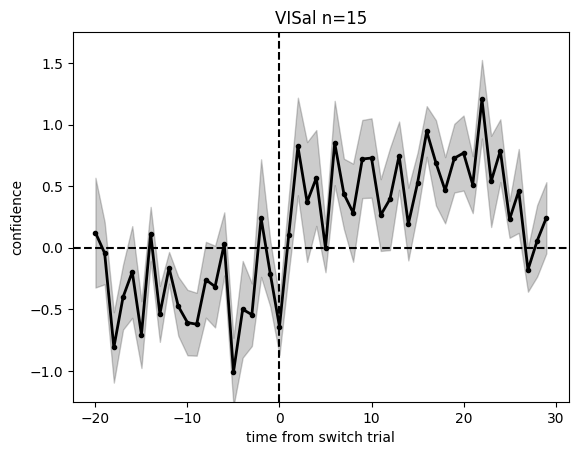

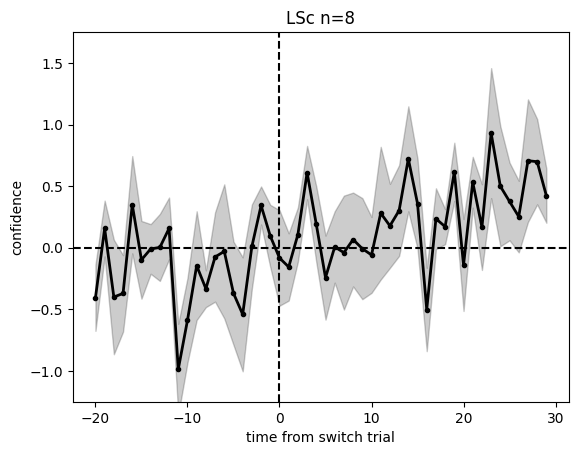

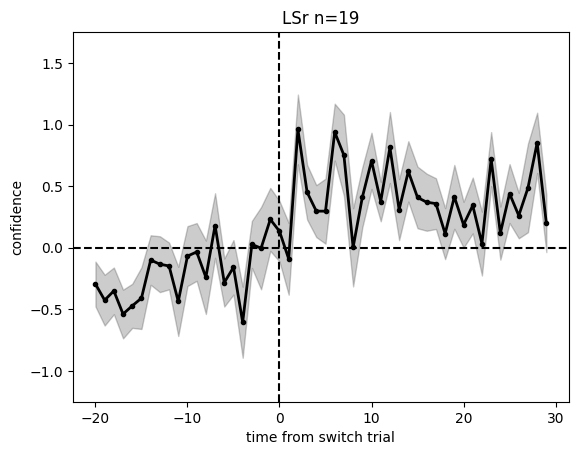

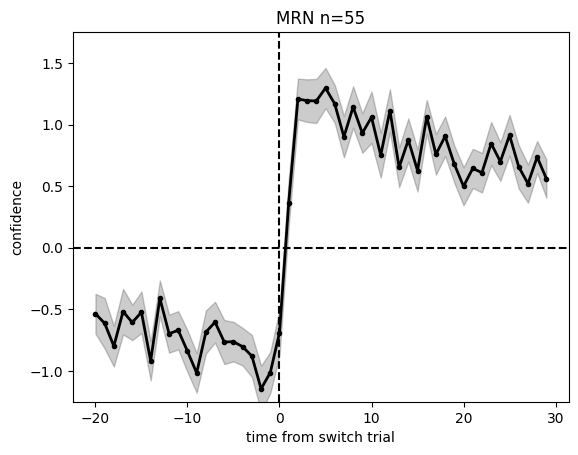

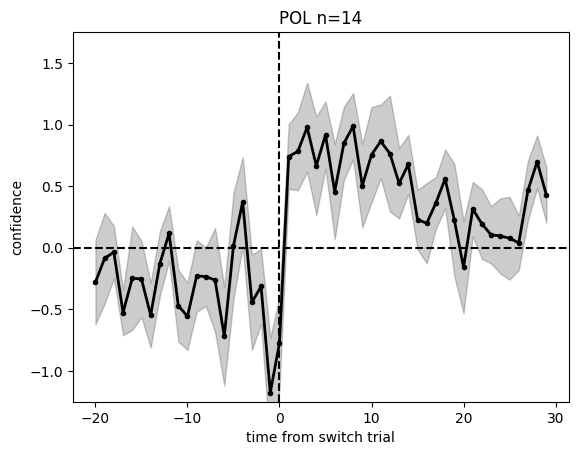

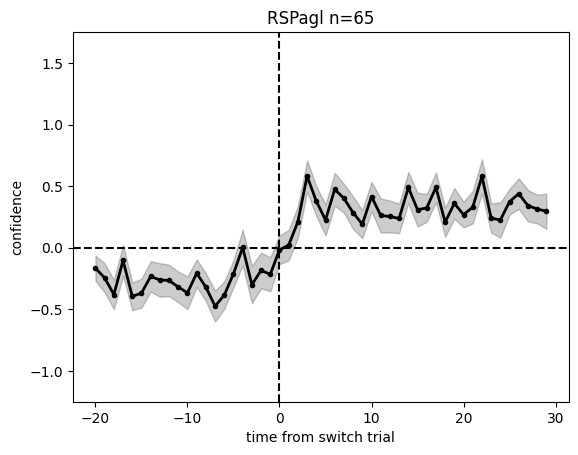

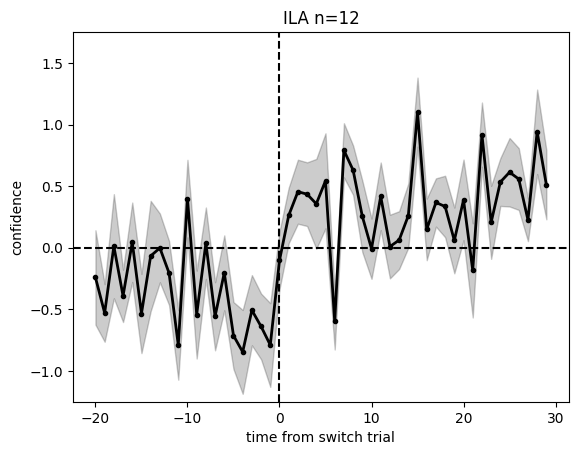

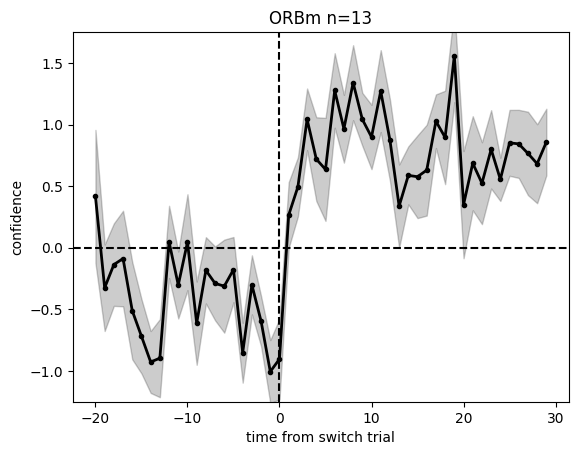

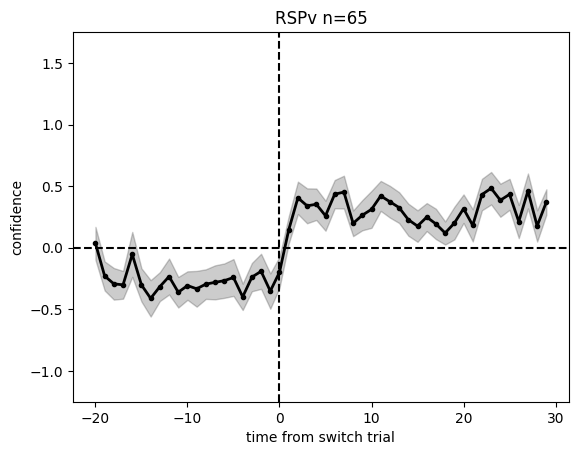

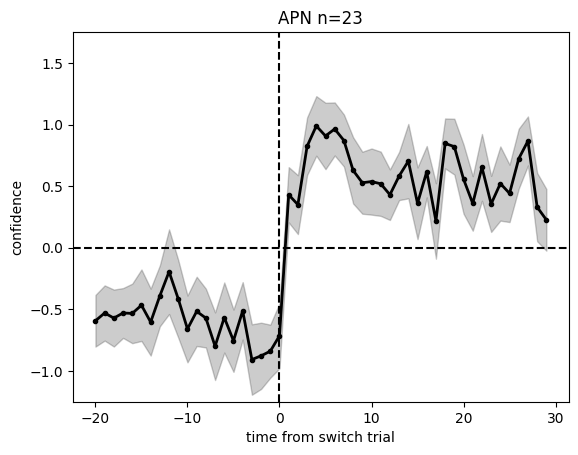

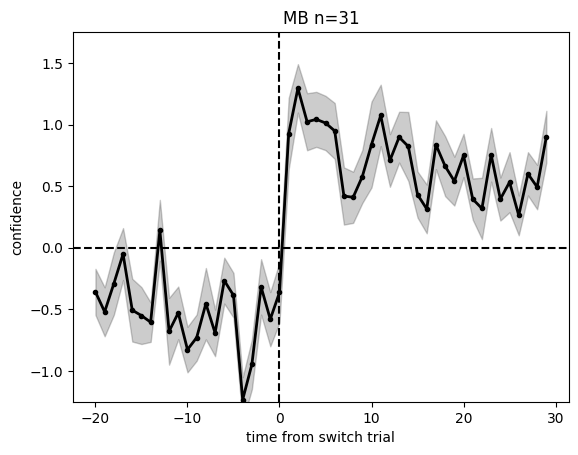

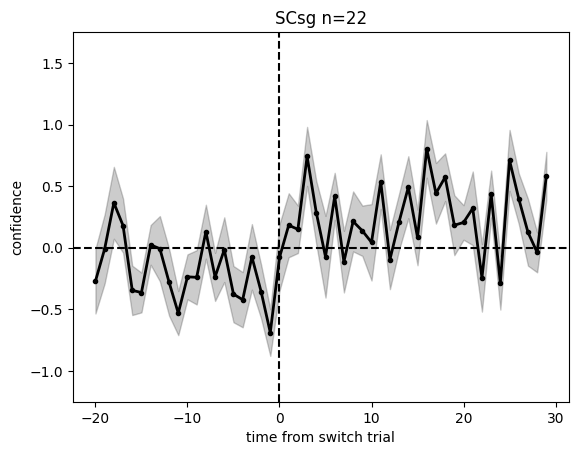

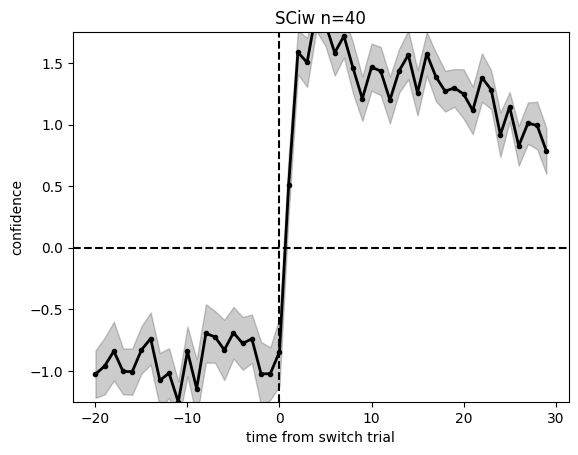

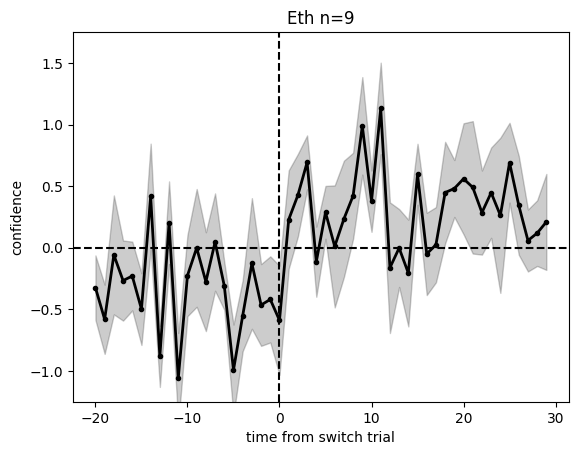

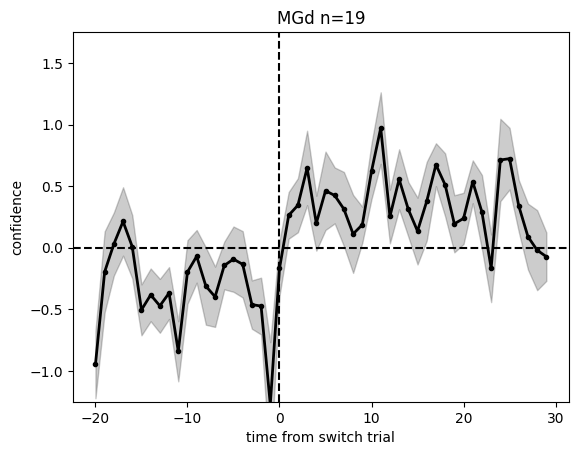

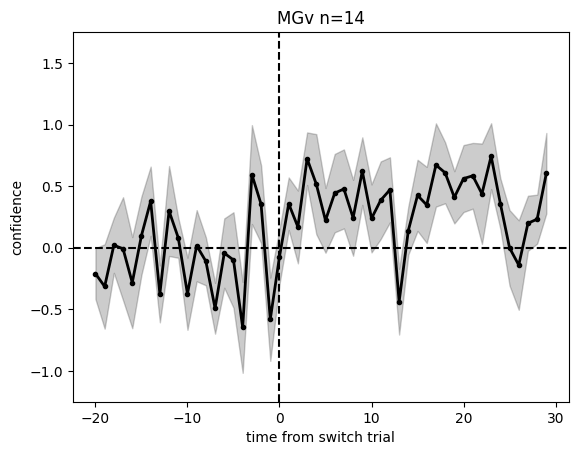

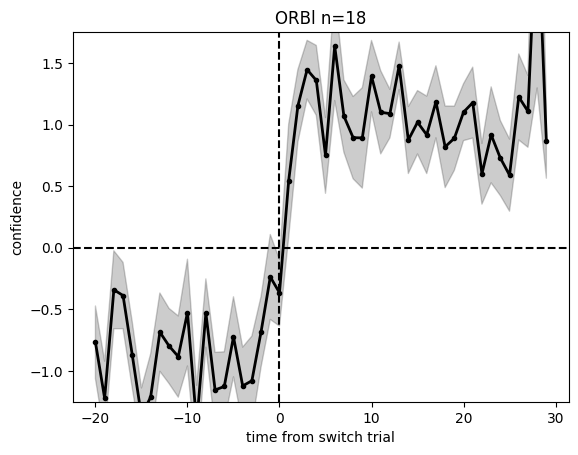

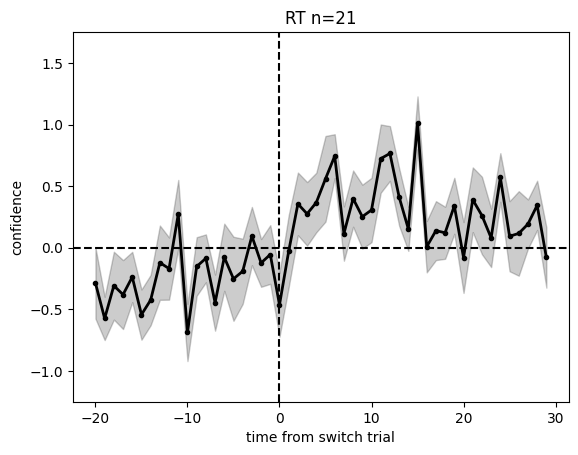

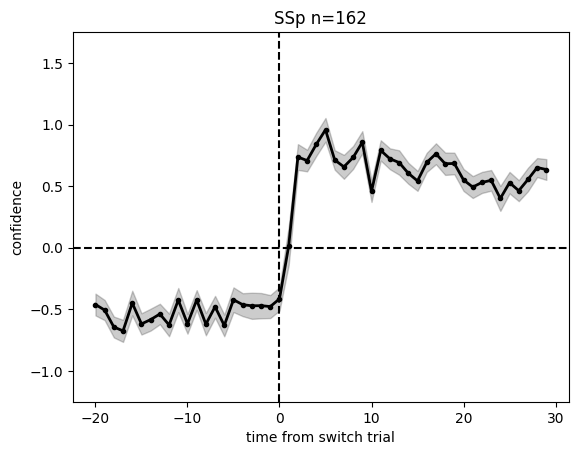

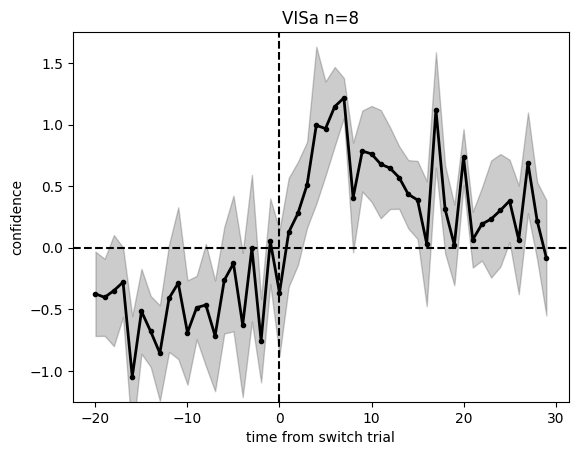

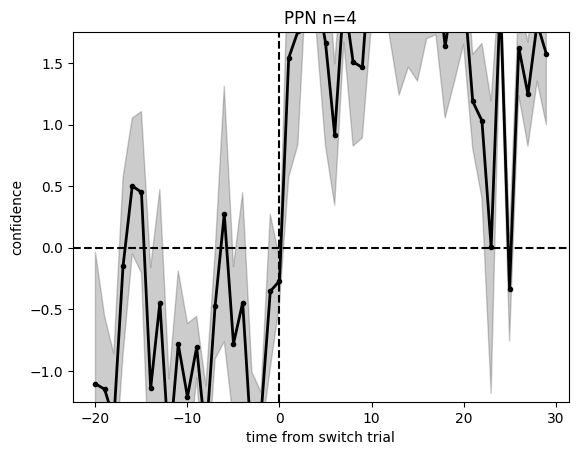

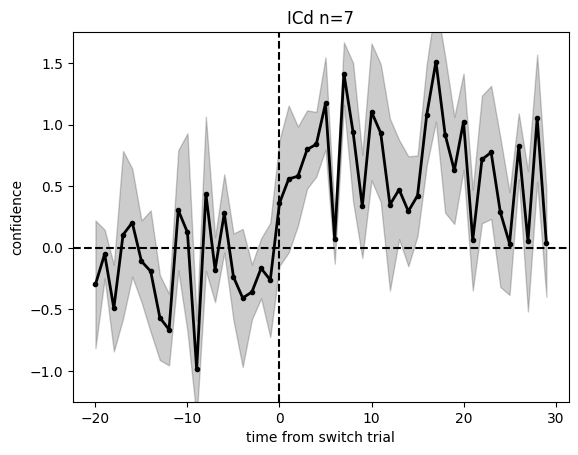

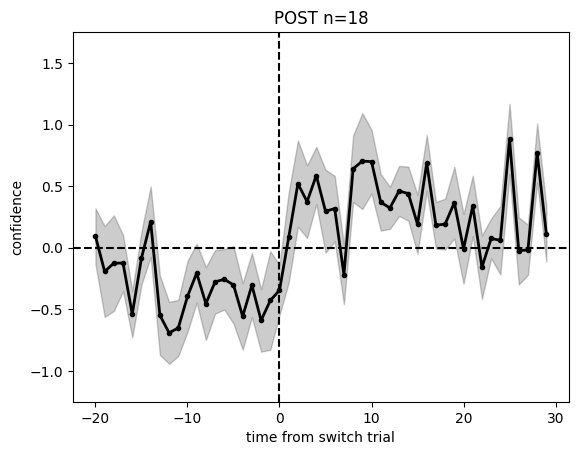

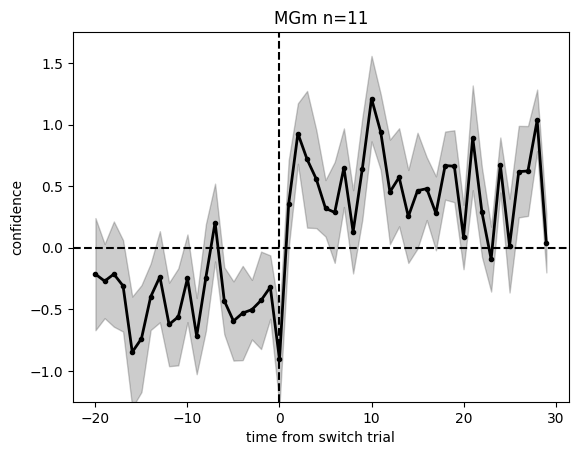

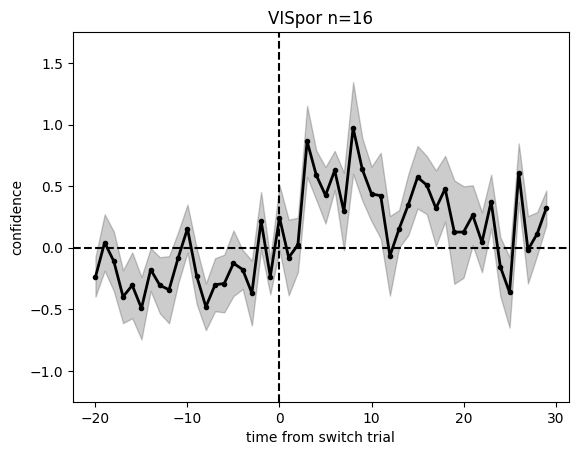

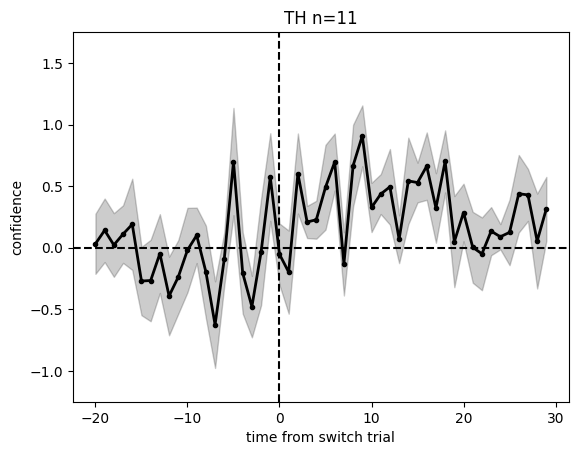

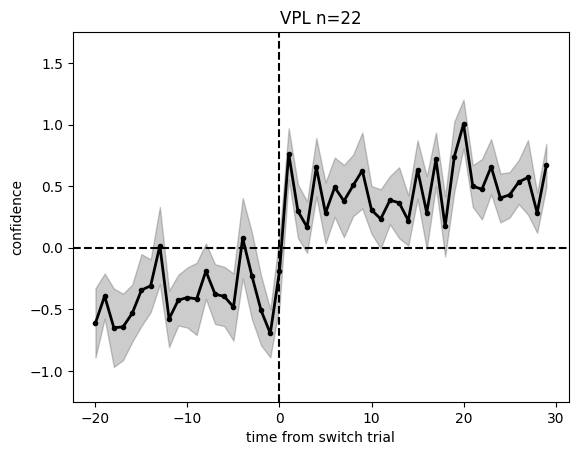

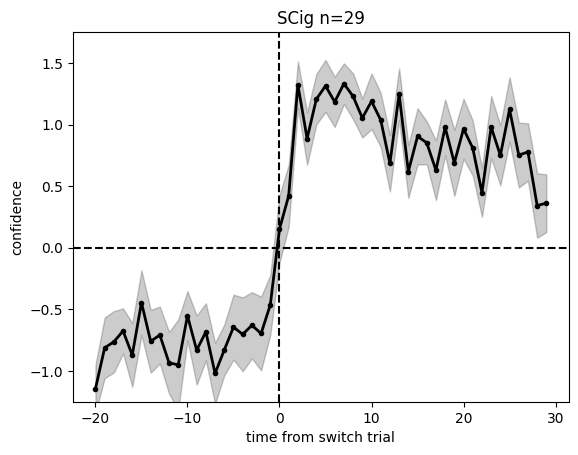

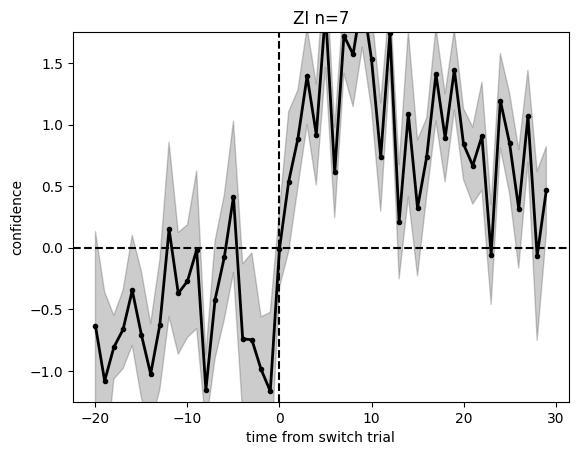

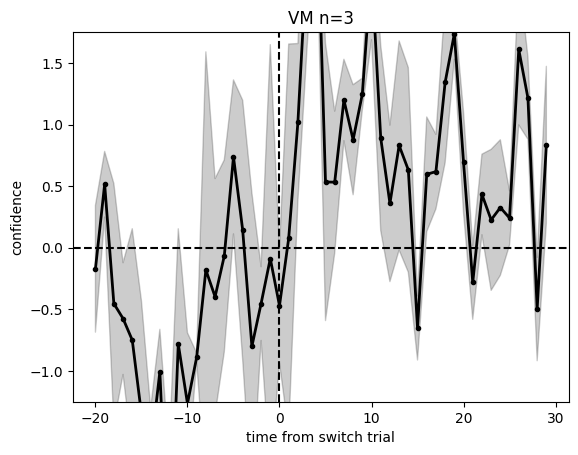

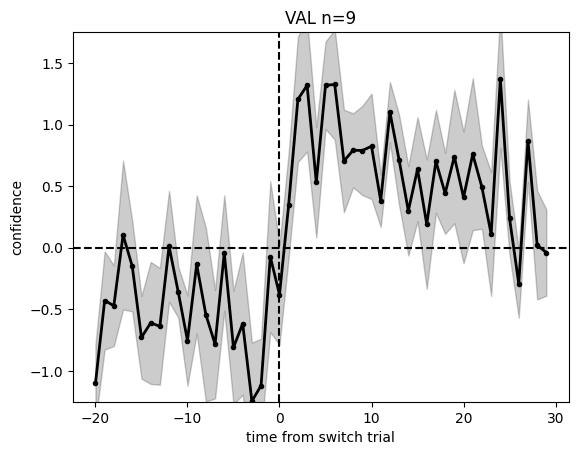

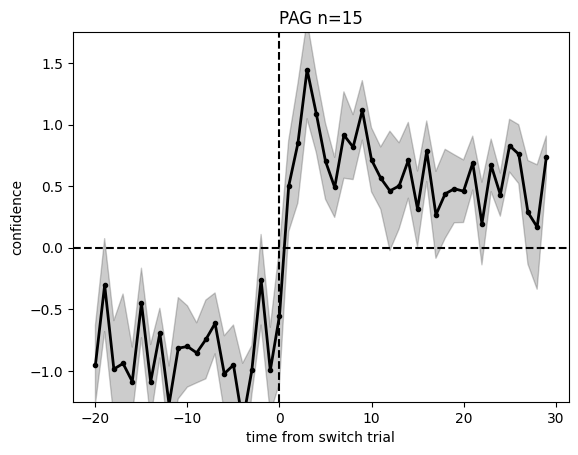

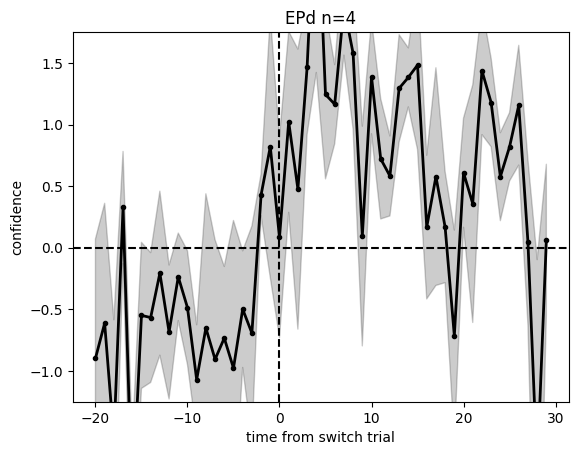

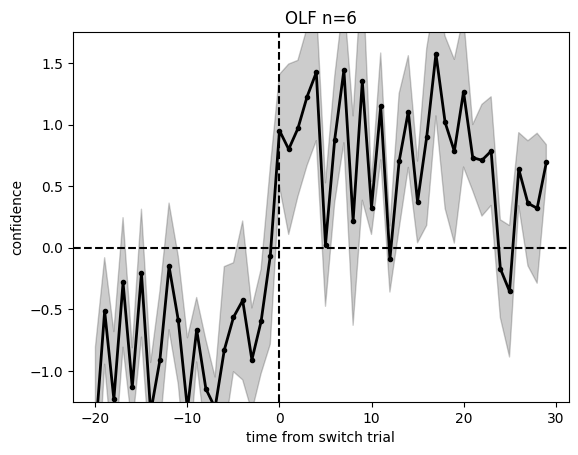

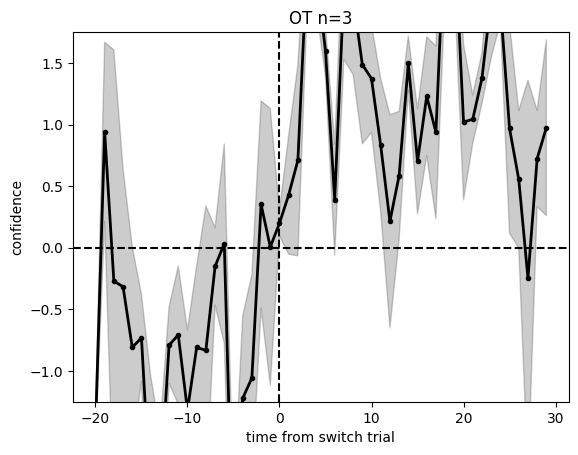

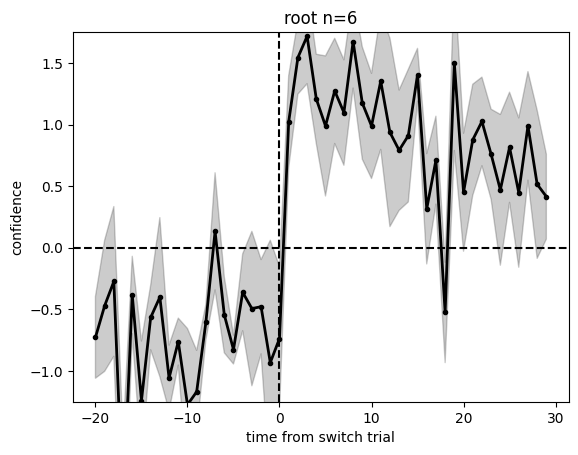

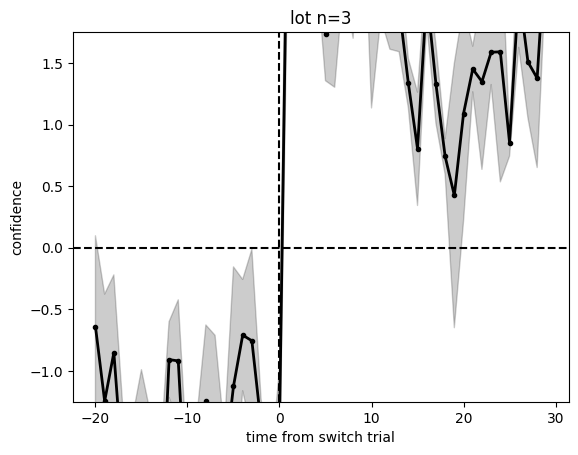

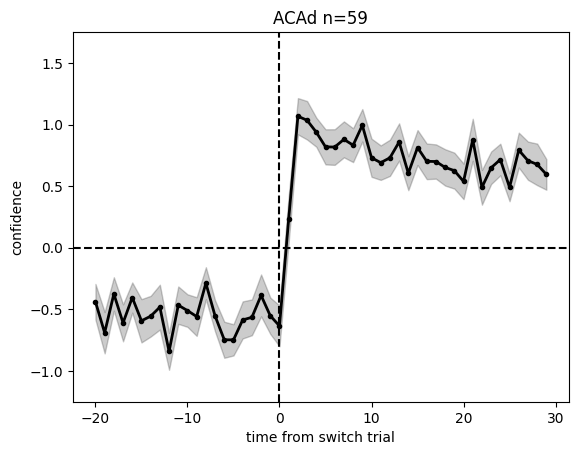

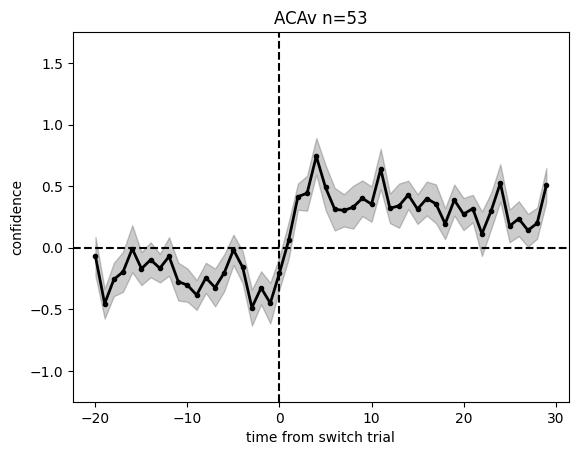

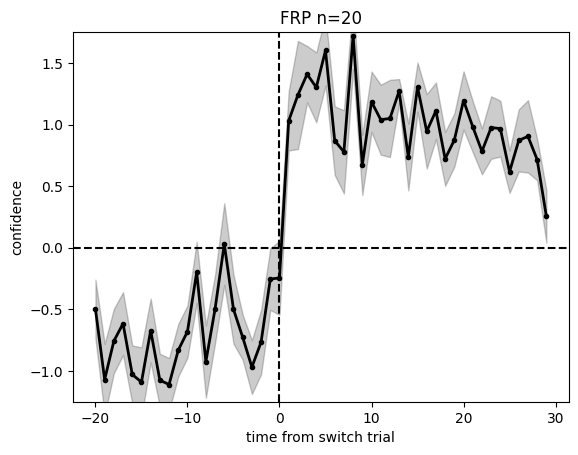

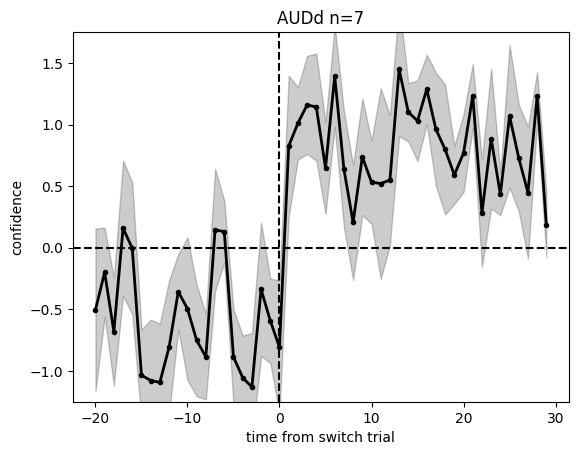

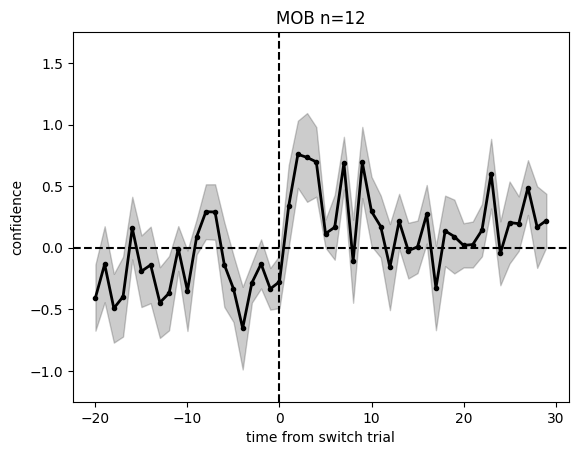

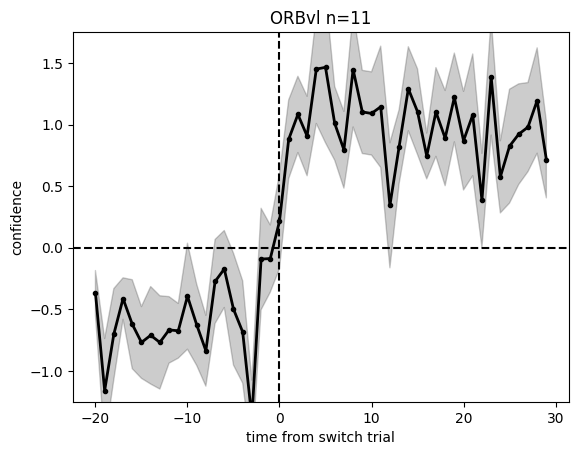

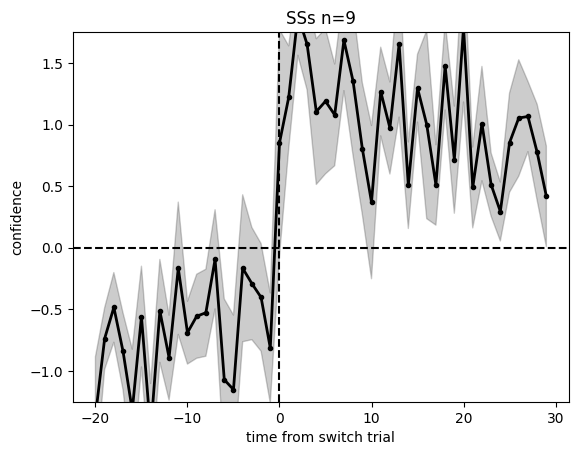

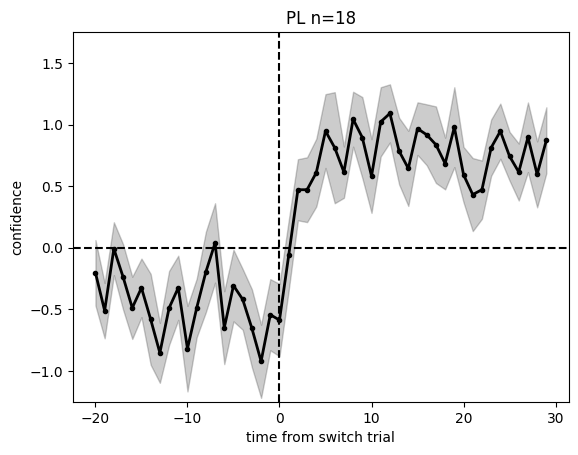

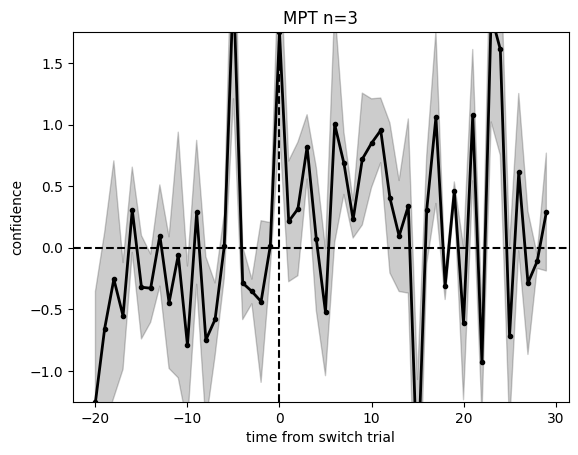

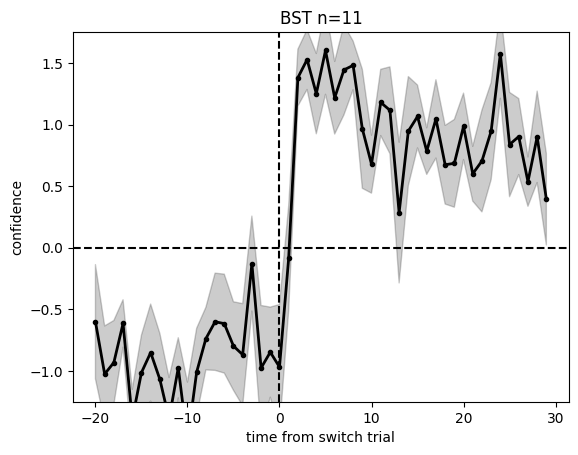

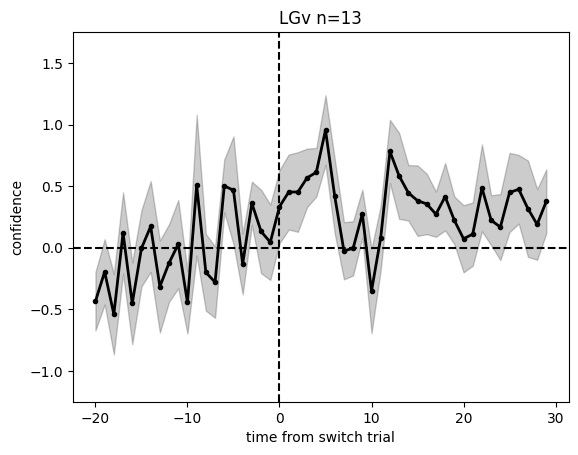

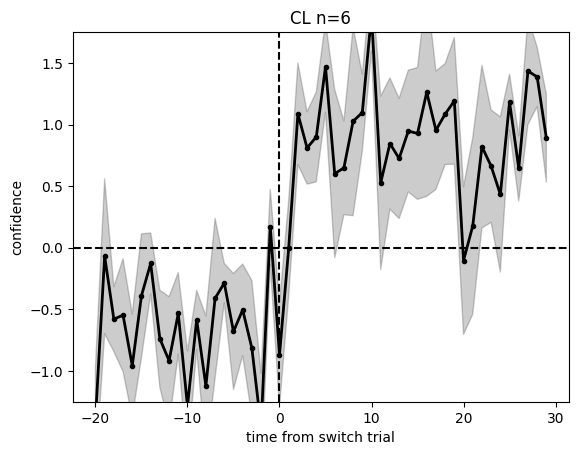

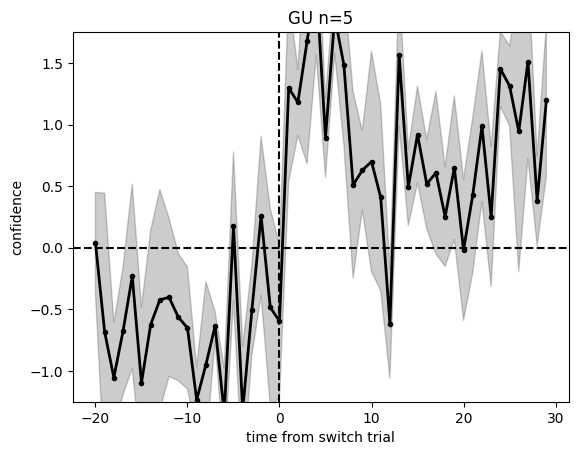

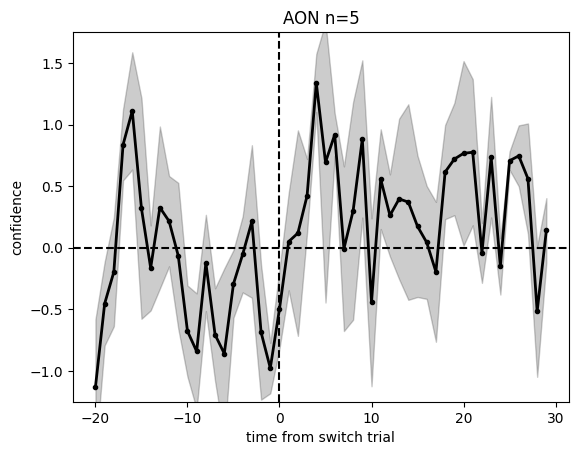

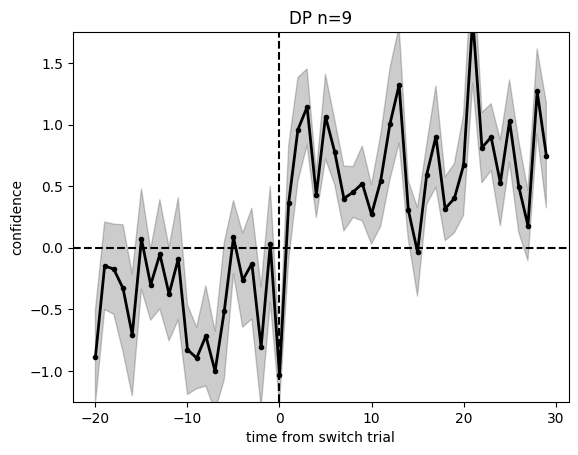

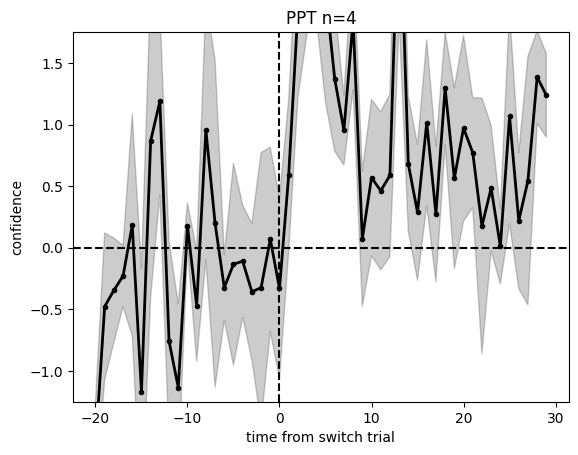

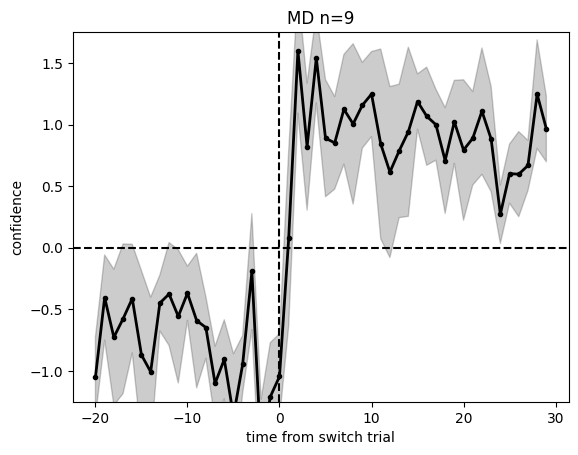

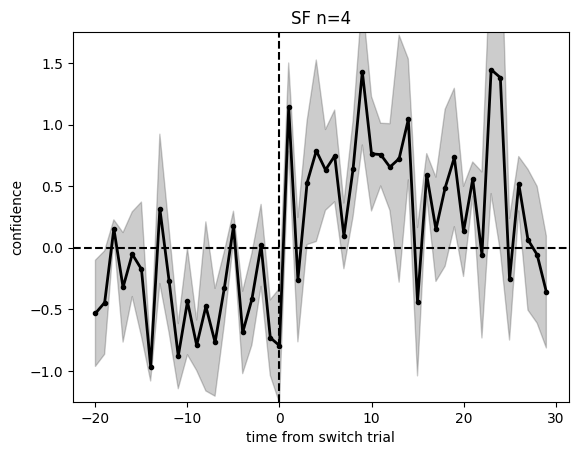

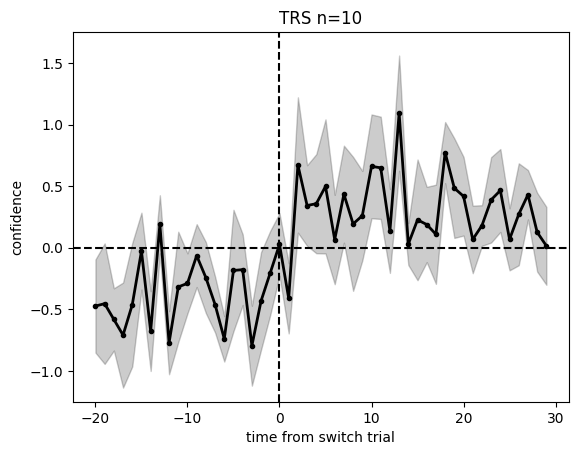

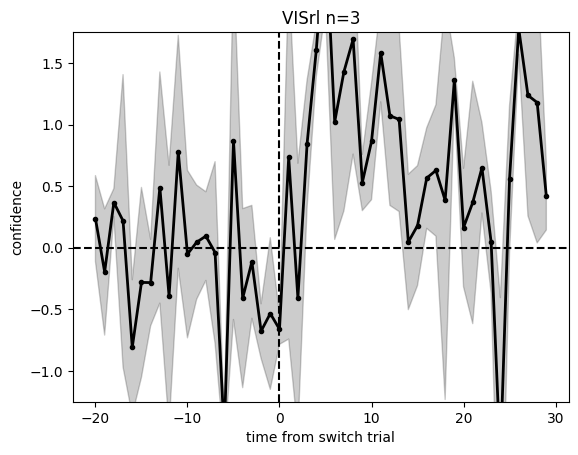

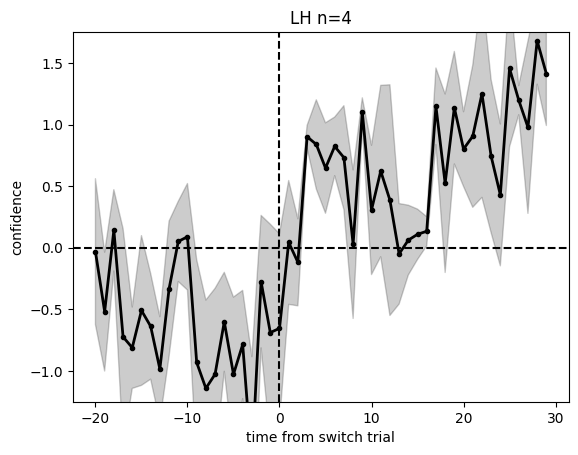

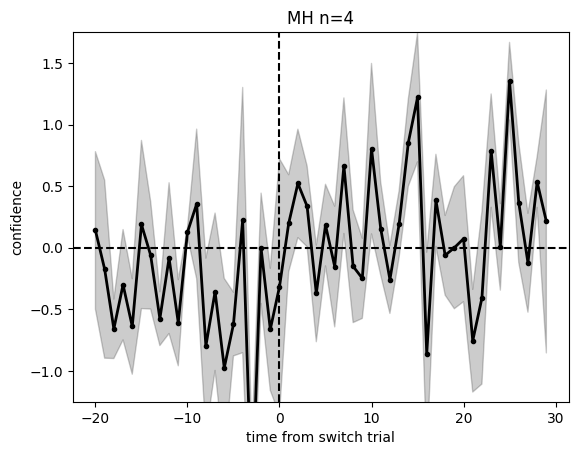

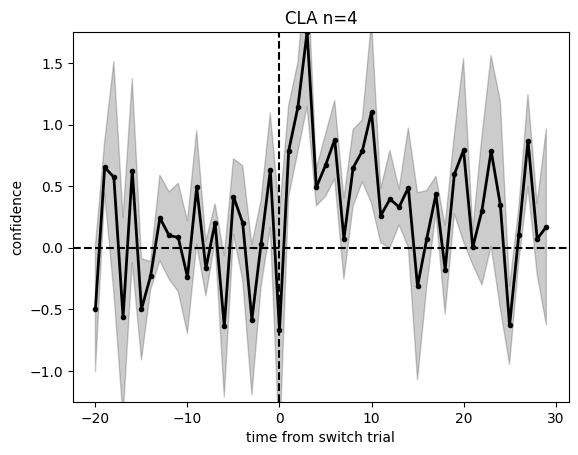

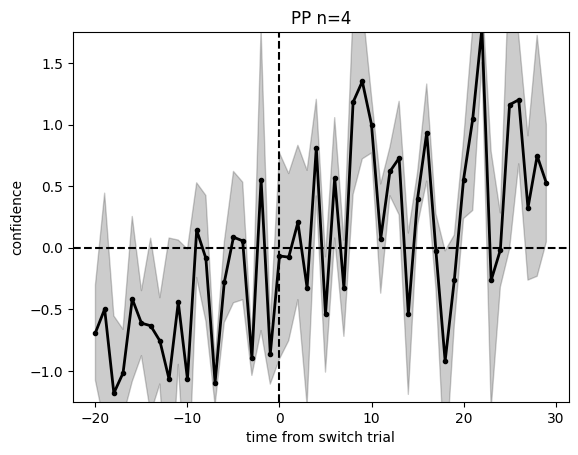

In [21]:
xvect=np.arange(-20,30)
dprime_threshold=1
for aa in decoder_confidence_by_switch['area'].unique():
    # aa='MRN'
    if type(aa)==str and 'probe' in aa:
        continue
    sel_area=decoder_confidence_by_switch.query('area==@aa and dprime_before>=@dprime_threshold and dprime_after>=@dprime_threshold and project.str.contains(@sel_project)')

    if len(sel_area)<min_n_recs:
        continue
    stackable=[]
    for xx in sel_area['confidence'].values:
        if len(xx)==50:
            stackable.append(xx)
    stackable=np.vstack(stackable)
    mean_confidence=np.nanmean(stackable,axis=0)

    fig,ax=plt.subplots(1,1)
    # for st,switch_trial in sel_area.iterrows():
        # if len(switch_trial['confidence'])==50:
        #     ax.plot(xvect,switch_trial['confidence'],color='gray',alpha=0.3)
    ax.axvline(0,color='k',linestyle='--')
    ax.axhline(0,color='k',linestyle='--')
    ax.plot(xvect,mean_confidence,'k.-',linewidth=2)
    ax.fill_between(xvect,np.nanmean(stackable,axis=0)-stats.sem(stackable,axis=0),np.nanmean(stackable,axis=0)+stats.sem(stackable,axis=0),alpha=0.2,color='k')

    ax.set_title(str(aa)+' n='+str(len(sel_area)))
    ax.set_xlabel('time from switch trial')
    ax.set_ylabel('confidence')
    ax.set_ylim([-1.25,1.75])
    # ax.set_xlim([-5,10])

In [ ]:
decoder_confidence_versus_trials_since_rewarded_target#['trials_since_rewarded_target'].values

Text(0.5, 1.0, 'all n=64 time r=-0.134 p=0.0')

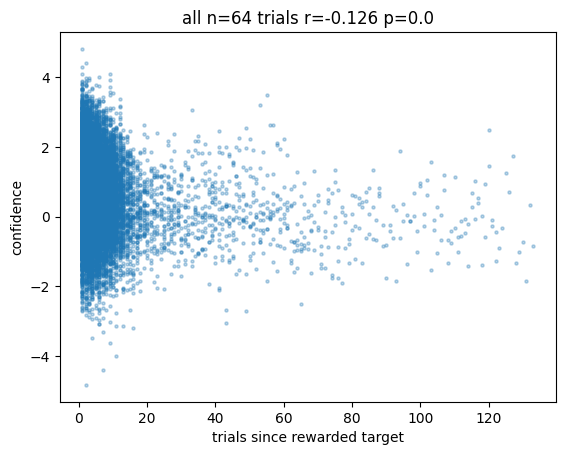

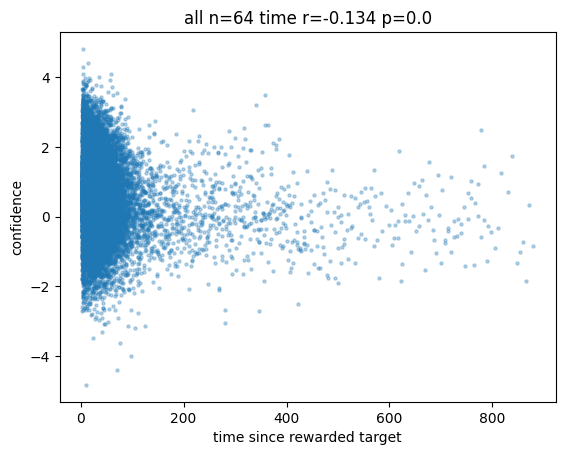

In [22]:
aa='all'
sel_area=decoder_confidence_versus_trials_since_rewarded_target.query('area==@aa and project.str.contains(@sel_project)')

# if len(sel_area)<min_n_recs:
#     continue

all_confidence=np.hstack(sel_area['confidence'].values)
all_trials_since_rewarded_target=np.hstack(sel_area['trials_since_rewarded_target'].values)
all_time_since_rewarded_target=np.hstack(sel_area['time_since_rewarded_target'].values)

#remove nans
nan_inds=np.where(np.isnan(all_confidence)|np.isnan(all_trials_since_rewarded_target)|np.isnan(all_time_since_rewarded_target))[0]
all_confidence=np.delete(all_confidence,nan_inds)
all_trials_since_rewarded_target=np.delete(all_trials_since_rewarded_target,nan_inds)
all_time_since_rewarded_target=np.delete(all_time_since_rewarded_target,nan_inds)

#get correlation values
correlation_trials=stats.pearsonr(all_trials_since_rewarded_target,all_confidence)
correlation_time=stats.pearsonr(all_time_since_rewarded_target,all_confidence)

fig,ax=plt.subplots(1,1)
ax.scatter(all_trials_since_rewarded_target,all_confidence,s=5,alpha=0.3)
ax.set_xlabel('trials since rewarded target')
ax.set_ylabel('confidence')
ax.set_title(str(aa)+' n='+str(len(sel_area))+' trials r='+str(np.round(correlation_trials[0],decimals=3))+' p='+str(np.round(correlation_trials[1],decimals=4)))

fig,ax=plt.subplots(1,1)
ax.scatter(all_time_since_rewarded_target,all_confidence,s=5,alpha=0.3)
ax.set_xlabel('time since rewarded target')
ax.set_ylabel('confidence')
ax.set_title(str(aa)+' n='+str(len(sel_area))+' time r='+str(np.round(correlation_time[0],decimals=3))+' p='+str(np.round(correlation_time[1],decimals=4)))

In [ ]:
# sel_area

c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(-0.2, 0.8)

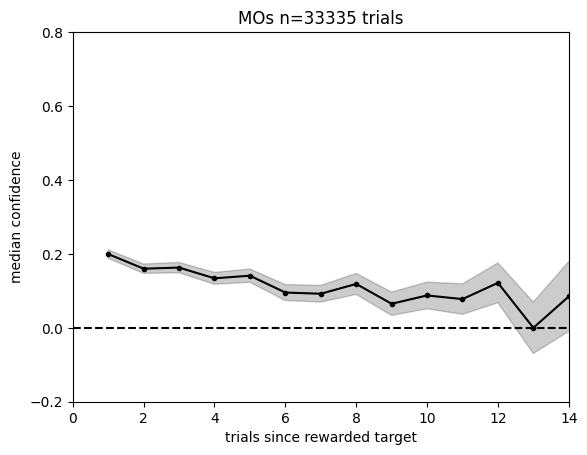

In [44]:
#plot median confidence per trial since rewarded target
aa='all'
sel_area=decoder_confidence_versus_trials_since_rewarded_target.query('area==@aa and project.str.contains(@sel_project)')
all_confidence=np.hstack(sel_area['confidence'].values)
all_trials_since_rewarded_target=np.hstack(sel_area['trials_since_rewarded_target'].values)

#remove nans
nan_inds=np.where(np.isnan(all_confidence)|np.isnan(all_trials_since_rewarded_target))[0]
all_confidence=np.delete(all_confidence,nan_inds)
all_trials_since_rewarded_target=np.delete(all_trials_since_rewarded_target,nan_inds)

median_confidence=[]
sem_confidence=[]
for tt in np.unique(all_trials_since_rewarded_target):
    median_confidence.append(np.nanmedian(all_confidence[all_trials_since_rewarded_target==tt]))
    sem_confidence.append(stats.sem(all_confidence[all_trials_since_rewarded_target==tt]))
fig,ax=plt.subplots(1,1)
ax.axhline(0,color='k',linestyle='--')
ax.plot(np.unique(all_trials_since_rewarded_target),median_confidence,'k.-')
ax.fill_between(np.unique(all_trials_since_rewarded_target),np.array(median_confidence)-np.array(sem_confidence),np.array(median_confidence)+np.array(sem_confidence),alpha=0.2,color='k')
ax.set_xlabel('trials since rewarded target')
ax.set_ylabel('median confidence')
ax.set_title(str(aa)+' n='+str(len(all_confidence))+' trials')
ax.set_xlim([0,14])
ax.set_ylim([-0.2,0.8])


c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Anaconda3\envs\npc_analysis\Lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


(-0.5, 0.8)

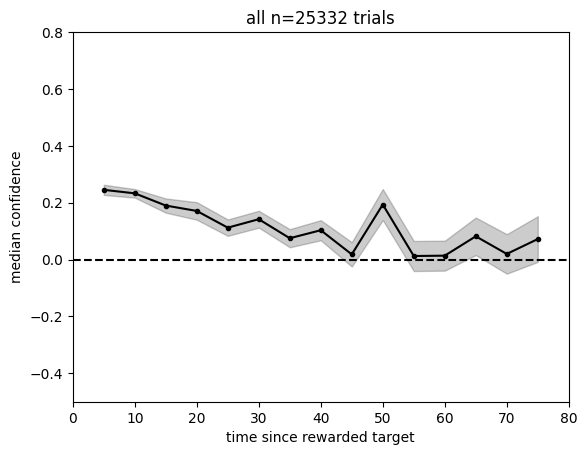

In [34]:
#plot mean confidence per time since rewarded target
aa='all'
time_bins=np.arange(0,80,5)

sel_area=decoder_confidence_versus_trials_since_rewarded_target.query('area==@aa and project.str.contains(@sel_project)')
all_confidence=np.hstack(sel_area['confidence'].values)
all_time_since_rewarded_target=np.hstack(sel_area['time_since_rewarded_target'].values)

#remove nans
nan_inds=np.where(np.isnan(all_confidence)|np.isnan(all_time_since_rewarded_target))[0]
all_confidence=np.delete(all_confidence,nan_inds)
all_time_since_rewarded_target=np.delete(all_time_since_rewarded_target,nan_inds)

median_confidence=[]
sem_confidence=[]
for tt in time_bins:
    median_confidence.append(np.nanmedian(all_confidence[np.logical_and(all_time_since_rewarded_target>=tt,all_time_since_rewarded_target<tt+1)]))
    sem_confidence.append(stats.sem(all_confidence[np.logical_and(all_time_since_rewarded_target>=tt,all_time_since_rewarded_target<tt+1)]))
fig,ax=plt.subplots(1,1)
ax.axhline(0,color='k',linestyle='--')
ax.plot(time_bins,median_confidence,'k.-')
ax.fill_between(time_bins,np.array(median_confidence)-np.array(sem_confidence),np.array(median_confidence)+np.array(sem_confidence),alpha=0.2,color='k')
ax.set_xlabel('time since rewarded target')
ax.set_ylabel('median confidence')
ax.set_title(str(aa)+' n='+str(len(all_confidence))+' trials')
ax.set_xlim([0,80])
ax.set_ylim([-0.5,0.8])



In [ ]:
decoder_confidence_before_after_target

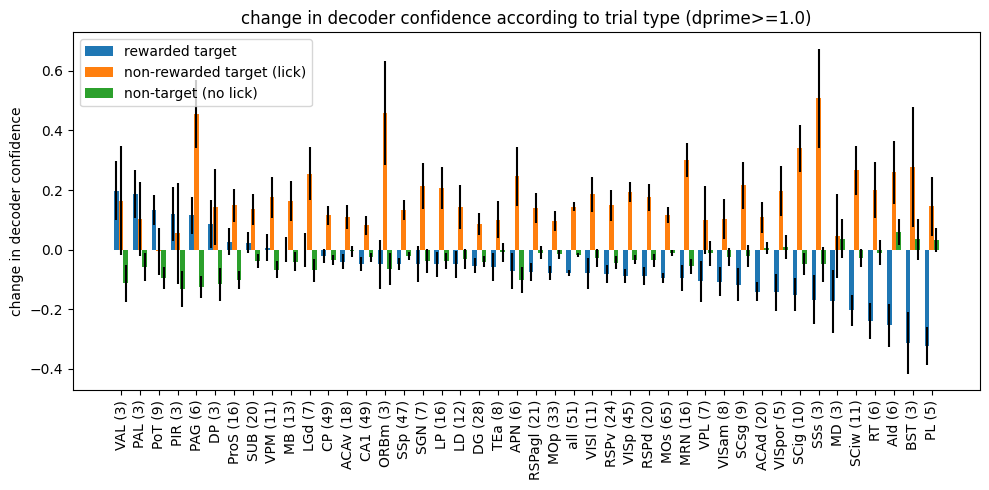

In [45]:
#plot change in decoder confidence by area

sel_project='DynamicRouting'
min_n_sessions=3
min_dprime=1.0
first_avg_session=False

change_in_decoder_confidence_by_trial_type_area={
    'area':[],
    'n_sessions':[],
    'rewarded_target':[],	
    'rewarded_target_plus_one':[],
    'rewarded_target_diff_mean':[],
    'rewarded_target_diff_sem':[],
    'rewarded_target_diff_p':[],
    'non_rewarded_target':[],	
    'non_rewarded_target_plus_one':[],
    'non_rewarded_target_diff_mean':[],
    'non_rewarded_target_diff_sem':[],
    'non_rewarded_target_diff_p':[],
    'non_rewarded_target_no_lick':[],
    'non_rewarded_target_no_lick_plus_one':[],
    'non_rewarded_target_no_lick_diff_mean':[],
    'non_rewarded_target_no_lick_diff_sem':[],
    'non_rewarded_target_no_lick_diff_p':[],
    'non_target_no_lick':[],
    'non_target_no_lick_plus_one':[],
    'non_target_no_lick_diff_mean':[],
    'non_target_no_lick_diff_sem':[],
    'non_target_no_lick_diff_p':[],

}

for aa in decoder_confidence_before_after_target['area'].unique():
    sel_area=decoder_confidence_before_after_target.query('area==@aa and project.str.contains(@sel_project) and cross_modal_dprime>=@min_dprime')
    if len(sel_area)==0:
        continue

    if first_avg_session:
        col_list=['rewarded_target','rewarded_target_plus_one','non_rewarded_target','non_rewarded_target_plus_one',
                'non_response_non_rewarded_target','non_response_non_rewarded_target_plus_one',
                'non_response_non_target_trials','non_response_non_target_trials_plus_one']
        for ss,session in sel_area.iterrows():
            for col in col_list:
                sel_area.loc[ss,col]=session[col].mean()

    change_in_decoder_confidence_by_trial_type_area['area'].append(aa)
    change_in_decoder_confidence_by_trial_type_area['n_sessions'].append(len(sel_area))
    change_in_decoder_confidence_by_trial_type_area['rewarded_target'].append(np.hstack(sel_area['rewarded_target']))
    change_in_decoder_confidence_by_trial_type_area['rewarded_target_plus_one'].append(np.hstack(sel_area['rewarded_target_plus_one']))
    change_in_decoder_confidence_by_trial_type_area['rewarded_target_diff_mean'].append(np.nanmean(np.hstack(sel_area['rewarded_target_plus_one']-sel_area['rewarded_target'])))
    change_in_decoder_confidence_by_trial_type_area['rewarded_target_diff_sem'].append(stats.sem(np.hstack(sel_area['rewarded_target_plus_one']-sel_area['rewarded_target'])))
    change_in_decoder_confidence_by_trial_type_area['rewarded_target_diff_p'].append(stats.wilcoxon(np.hstack(sel_area['rewarded_target_plus_one']),np.hstack(sel_area['rewarded_target']))[1])

    change_in_decoder_confidence_by_trial_type_area['non_rewarded_target'].append(sel_area['non_rewarded_target'])
    change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_plus_one'].append(sel_area['non_rewarded_target_plus_one'])
    change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_diff_mean'].append(np.nanmean(np.hstack(sel_area['non_rewarded_target_plus_one']-sel_area['non_rewarded_target'])))
    change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_diff_sem'].append(stats.sem(np.hstack(sel_area['non_rewarded_target_plus_one']-sel_area['non_rewarded_target'])))
    change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_diff_p'].append(stats.wilcoxon(np.hstack(sel_area['non_rewarded_target_plus_one']),np.hstack(sel_area['non_rewarded_target']))[1])

    change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_no_lick'].append(sel_area['non_response_non_rewarded_target'])
    change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_no_lick_plus_one'].append(sel_area['non_response_non_rewarded_target_plus_one'])
    change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_no_lick_diff_mean'].append(np.nanmean(np.hstack(sel_area['non_response_non_rewarded_target_plus_one']-sel_area['non_response_non_rewarded_target'])))
    change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_no_lick_diff_sem'].append(stats.sem(np.hstack(sel_area['non_response_non_rewarded_target_plus_one']-sel_area['non_response_non_rewarded_target'])))
    change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_no_lick_diff_p'].append(stats.wilcoxon(np.hstack(sel_area['non_response_non_rewarded_target_plus_one']),np.hstack(sel_area['non_response_non_rewarded_target']))[1])
    
    change_in_decoder_confidence_by_trial_type_area['non_target_no_lick'].append(sel_area['non_response_non_target_trials'])
    change_in_decoder_confidence_by_trial_type_area['non_target_no_lick_plus_one'].append(sel_area['non_response_non_target_trials_plus_one'])
    change_in_decoder_confidence_by_trial_type_area['non_target_no_lick_diff_mean'].append(np.nanmean(np.hstack(sel_area['non_response_non_target_trials_plus_one']-sel_area['non_response_non_target_trials'])))
    change_in_decoder_confidence_by_trial_type_area['non_target_no_lick_diff_sem'].append(stats.sem(np.hstack(sel_area['non_response_non_target_trials_plus_one']-sel_area['non_response_non_target_trials'])))
    change_in_decoder_confidence_by_trial_type_area['non_target_no_lick_diff_p'].append(stats.wilcoxon(np.hstack(sel_area['non_response_non_target_trials_plus_one']),np.hstack(sel_area['non_response_non_target_trials']))[1])

change_in_decoder_confidence_by_trial_type_area=pd.DataFrame(change_in_decoder_confidence_by_trial_type_area)

plot_data=change_in_decoder_confidence_by_trial_type_area.query('n_sessions>=@min_n_sessions and \
                                                                (rewarded_target_diff_p<0.05 or \
                                                                non_rewarded_target_diff_p<0.05 or \
                                                                non_rewarded_target_no_lick_diff_p<0.05 or \
                                                                non_target_no_lick_diff_p<0.05)').sort_values(by='rewarded_target_diff_mean',ascending=False)

xvect=np.arange(len(plot_data))

fig,ax=plt.subplots(figsize=(10,5))
ax.bar(xvect-0.25,plot_data['rewarded_target_diff_mean'],yerr=plot_data['rewarded_target_diff_sem'],width=0.25)
ax.bar(xvect,plot_data['non_rewarded_target_diff_mean'],yerr=plot_data['non_rewarded_target_diff_sem'],width=0.25)
# ax.bar(xvect+0.1,plot_data['non_rewarded_target_no_lick_diff_mean'],yerr=plot_data['non_rewarded_target_no_lick_diff_sem'],width=0.2)
ax.bar(xvect+0.25,plot_data['non_target_no_lick_diff_mean'],yerr=plot_data['non_target_no_lick_diff_sem'],width=0.25)
# ax.legend(['rewarded target','non-rewarded target (lick)','non-rewarded target (no lick)','non-target (no lick)'])
ax.legend(['rewarded target','non-rewarded target (lick)','non-target (no lick)'])

area_labels=[]
for i in range(plot_data.shape[0]):
    area_labels.append(plot_data['area'].iloc[i]+' ('+str(plot_data['n_sessions'].iloc[i])+')')
ax.set_xticks(np.arange(len(plot_data)))
ax.set_xticklabels(area_labels,rotation=90,ha='center')
ax.set_ylabel('change in decoder confidence')

ax.set_title('change in decoder confidence according to trial type ('+'dprime>='+str(min_dprime)+')')

# ax.legend(['vis context','aud context'])

fig.tight_layout()




In [ ]:
# #plot change in decoder confidence by area
# #average first within sessions

# sel_project='DynamicRouting'
# min_n_sessions=3
# min_dprime=0.5

# change_in_decoder_confidence_by_trial_type_area={
#     'area':[],
#     'n_sessions':[],
#     'rewarded_target':[],	
#     'rewarded_target_plus_one':[],
#     'rewarded_target_diff_mean':[],
#     'rewarded_target_diff_sem':[],
#     'rewarded_target_diff_p':[],
#     'non_rewarded_target':[],	
#     'non_rewarded_target_plus_one':[],
#     'non_rewarded_target_diff_mean':[],
#     'non_rewarded_target_diff_sem':[],
#     'non_rewarded_target_diff_p':[],
#     'non_rewarded_target_no_lick':[],
#     'non_rewarded_target_no_lick_plus_one':[],
#     'non_rewarded_target_no_lick_diff_mean':[],
#     'non_rewarded_target_no_lick_diff_sem':[],
#     'non_rewarded_target_no_lick_diff_p':[],
#     'non_target_no_lick':[],
#     'non_target_no_lick_plus_one':[],
#     'non_target_no_lick_diff_mean':[],
#     'non_target_no_lick_diff_sem':[],
#     'non_target_no_lick_diff_p':[],

# }

# for aa in decoder_confidence_before_after_target['area'].unique():
#     sel_area=decoder_confidence_before_after_target.query('area==@aa and project.str.contains(@sel_project) and cross_modal_dprime>=@min_dprime')
#     if len(sel_area)==0:
#         continue
    
#     col_list=['rewarded_target','rewarded_target_plus_one','non_rewarded_target','non_rewarded_target_plus_one',
#               'non_response_non_rewarded_target','non_response_non_rewarded_target_plus_one',
#               'non_response_non_target_trials','non_response_non_target_trials_plus_one']
#     for ss,session in sel_area.iterrows():
#         for col in col_list:
#             sel_area.loc[ss,col]=session[col].mean()

#     change_in_decoder_confidence_by_trial_type_area['area'].append(aa)
#     change_in_decoder_confidence_by_trial_type_area['n_sessions'].append(len(sel_area))
#     change_in_decoder_confidence_by_trial_type_area['rewarded_target'].append(np.hstack(sel_area['rewarded_target']))
#     change_in_decoder_confidence_by_trial_type_area['rewarded_target_plus_one'].append(np.hstack(sel_area['rewarded_target_plus_one']))
#     change_in_decoder_confidence_by_trial_type_area['rewarded_target_diff_mean'].append(np.nanmean(np.hstack(sel_area['rewarded_target_plus_one']-sel_area['rewarded_target'])))
#     change_in_decoder_confidence_by_trial_type_area['rewarded_target_diff_sem'].append(stats.sem(np.hstack(sel_area['rewarded_target_plus_one']-sel_area['rewarded_target'])))
#     change_in_decoder_confidence_by_trial_type_area['rewarded_target_diff_p'].append(stats.wilcoxon(np.hstack(sel_area['rewarded_target_plus_one']),np.hstack(sel_area['rewarded_target']))[1])

#     change_in_decoder_confidence_by_trial_type_area['non_rewarded_target'].append(sel_area['non_rewarded_target'])
#     change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_plus_one'].append(sel_area['non_rewarded_target_plus_one'])
#     change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_diff_mean'].append(np.nanmean(np.hstack(sel_area['non_rewarded_target_plus_one']-sel_area['non_rewarded_target'])))
#     change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_diff_sem'].append(stats.sem(np.hstack(sel_area['non_rewarded_target_plus_one']-sel_area['non_rewarded_target'])))
#     change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_diff_p'].append(stats.wilcoxon(np.hstack(sel_area['non_rewarded_target_plus_one']),np.hstack(sel_area['non_rewarded_target']))[1])

#     change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_no_lick'].append(sel_area['non_response_non_rewarded_target'])
#     change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_no_lick_plus_one'].append(sel_area['non_response_non_rewarded_target_plus_one'])
#     change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_no_lick_diff_mean'].append(np.nanmean(np.hstack(sel_area['non_response_non_rewarded_target_plus_one']-sel_area['non_response_non_rewarded_target'])))
#     change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_no_lick_diff_sem'].append(stats.sem(np.hstack(sel_area['non_response_non_rewarded_target_plus_one']-sel_area['non_response_non_rewarded_target'])))
#     change_in_decoder_confidence_by_trial_type_area['non_rewarded_target_no_lick_diff_p'].append(stats.wilcoxon(np.hstack(sel_area['non_response_non_rewarded_target_plus_one']),np.hstack(sel_area['non_response_non_rewarded_target']))[1])
    
#     change_in_decoder_confidence_by_trial_type_area['non_target_no_lick'].append(sel_area['non_response_non_target_trials'])
#     change_in_decoder_confidence_by_trial_type_area['non_target_no_lick_plus_one'].append(sel_area['non_response_non_target_trials_plus_one'])
#     change_in_decoder_confidence_by_trial_type_area['non_target_no_lick_diff_mean'].append(np.nanmean(np.hstack(sel_area['non_response_non_target_trials_plus_one']-sel_area['non_response_non_target_trials'])))
#     change_in_decoder_confidence_by_trial_type_area['non_target_no_lick_diff_sem'].append(stats.sem(np.hstack(sel_area['non_response_non_target_trials_plus_one']-sel_area['non_response_non_target_trials'])))
#     change_in_decoder_confidence_by_trial_type_area['non_target_no_lick_diff_p'].append(stats.wilcoxon(np.hstack(sel_area['non_response_non_target_trials_plus_one']),np.hstack(sel_area['non_response_non_target_trials']))[1])

# change_in_decoder_confidence_by_trial_type_area=pd.DataFrame(change_in_decoder_confidence_by_trial_type_area)

# plot_data=change_in_decoder_confidence_by_trial_type_area.query('n_sessions>=@min_n_sessions and \
#                                                                 (rewarded_target_diff_p<0.05 or \
#                                                                 non_rewarded_target_diff_p<0.05 or \
#                                                                 non_rewarded_target_no_lick_diff_p<0.05 or \
#                                                                 non_target_no_lick_diff_p<0.05)').sort_values(by='rewarded_target_diff_mean',ascending=False)

# xvect=np.arange(len(plot_data))

# fig,ax=plt.subplots(figsize=(12,6))
# ax.bar(xvect-0.25,plot_data['rewarded_target_diff_mean'],yerr=plot_data['rewarded_target_diff_sem'],width=0.25)
# ax.bar(xvect,plot_data['non_rewarded_target_diff_mean'],yerr=plot_data['non_rewarded_target_diff_sem'],width=0.25)
# # ax.bar(xvect+0.1,plot_data['non_rewarded_target_no_lick_diff_mean'],yerr=plot_data['non_rewarded_target_no_lick_diff_sem'],width=0.2)
# ax.bar(xvect+0.25,plot_data['non_target_no_lick_diff_mean'],yerr=plot_data['non_target_no_lick_diff_sem'],width=0.25)
# # ax.legend(['rewarded target','non-rewarded target (lick)','non-rewarded target (no lick)','non-target (no lick)'])
# ax.legend(['rewarded target','non-rewarded target (lick)','non-target (no lick)'])

# area_labels=[]
# for i in range(plot_data.shape[0]):
#     area_labels.append(plot_data['area'].iloc[i]+' ('+str(plot_data['n_sessions'].iloc[i])+')')
# ax.set_xticks(np.arange(len(plot_data)))
# ax.set_xticklabels(area_labels,rotation=90,ha='center')
# ax.set_ylabel('change in decoder confidence')

# ax.set_title('change in decoder confidence according to trial type ('+'dprime>='+str(min_dprime)+')')

# # ax.legend(['vis context','aud context'])

# fig.tight_layout()




In [ ]:
for aa in decoder_confidence_before_after_target['area'].unique():
# aa='all'
    sel_project='DynamicRouting'
    if type(aa)==str and 'probe' in aa:
        continue
    sel_area=decoder_confidence_before_after_target.query('area==@aa and project.str.contains(@sel_project)')
    if len(sel_area)==0:
        continue

    rewarded_target=np.hstack(sel_area['rewarded_target'].values)
    rewarded_target_plus_one=np.hstack(sel_area['rewarded_target_plus_one'].values)

    rewarded_target_data_norm=rewarded_target_plus_one-rewarded_target

    non_rewarded_target=np.hstack(sel_area['non_rewarded_target'].values)
    non_rewarded_target_plus_one=np.hstack(sel_area['non_rewarded_target_plus_one'].values)

    non_response_non_rewarded_target=np.hstack(sel_area['non_response_non_rewarded_target'].values)
    non_response_non_rewarded_target_plus_one=np.hstack(sel_area['non_response_non_rewarded_target_plus_one'].values)


    fig,ax=plt.subplots(1,1)
    ax.axhline(0,color='k',linestyle='--')
    # ax.plot([0,1],np.vstack([rewarded_target-rewarded_target,rewarded_target_plus_one-rewarded_target]),label='rewarded target',color='grey',alpha=0.2)
    ax.plot([0],np.nanmedian(rewarded_target_plus_one-rewarded_target),'ko')
    ax.errorbar([0],np.nanmedian(rewarded_target_plus_one-rewarded_target),yerr=stats.sem(rewarded_target_plus_one-rewarded_target),color='k')
    ax.plot([1],np.nanmedian(non_rewarded_target_plus_one-non_rewarded_target),'ko')
    ax.errorbar([1],np.nanmedian(non_rewarded_target_plus_one-non_rewarded_target),yerr=stats.sem(non_rewarded_target_plus_one-non_rewarded_target),color='k')
    ax.plot([2],np.nanmedian(non_response_non_rewarded_target_plus_one-non_response_non_rewarded_target),'ko')
    ax.errorbar([2],np.nanmedian(non_response_non_rewarded_target_plus_one-non_response_non_rewarded_target),yerr=stats.sem(non_response_non_rewarded_target_plus_one-non_response_non_rewarded_target,nan_policy='omit'),color='k')
    ax.set_xticks([0,1,2])
    ax.set_xticklabels(['rewarded target','non-rewarded target (lick)','non-rewarded target (no lick)'])
    ax.set_ylabel('change in decoder confidence')
    ax.set_title(str(aa)+' n='+str(len(rewarded_target_data_norm))+' trials')


In [ ]:
decoder_results[session_id]['results'].keys()

In [ ]:
decoder_results[session_id]['areas']

In [ ]:
switch_trial

In [ ]:
#plot confidence for hits, crs, fas for each area

#which areas had largest difference between fas and crs

#output: table with area, session, hit, cr, fa (avg ccf location?)


In [ ]:
#plot block cross-modal dprime versus mean decoder confidence?

#for each area

#correlation between dprime and decoder confidence for each area?
#areas with highest correlation probably are most important to task

#sub areas?? MOs, CP, etc.

#output: table with area, session, block, dprime, mean decoder confidence


In [ ]:
#concat all switches for each area
### how to normalize?? divide by stdev of confidence?

#output: table with area, session, block before, block after, dprime before, dprime after, decoder confidence array

In [ ]:
#plot decoder confidence versus trials/time since last rewarded target?

#add column to trials table for time/trials since last rewarded target

#plot decoder confidence versus time since last rewarded target

In [ ]:
session_id=list(decoder_results.keys())[1]
decoder_results[session_id]['results'].keys()

In [ ]:
#single session analysis
#trial-trial decoding: decision function
session_id=list(decoder_results.keys())[1]
aa='MOs'

shifts=decoder_results[session_id]['shifts']
areas=decoder_results[session_id]['areas']

half_neg_shift=np.round(shifts.min()/2)
half_pos_shift=np.round(shifts.max()/2)
# half_shifts=np.arange(-half_neg_shift,half_pos_shift+1)
half_neg_shift_ind=np.where(shifts==half_neg_shift)[0][0]
half_pos_shift_ind=np.where(shifts==half_pos_shift)[0][0]
half_shift_inds=np.arange(half_neg_shift_ind,half_pos_shift_ind+1)

decision_function_shifts=[]

for sh in half_shift_inds:
    decision_function_shifts.append(decoder_results[session_id]['results'][aa]['shift'][sh]['decision_function'])

true_label=decoder_results[session_id]['results'][aa]['shift'][np.where(shifts==0)[0][0]]['true_label']

decision_function_shifts=np.vstack(decision_function_shifts)
decision_function_shifts

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(decoder_results[session_id]['middle_4_blocks'],decision_function_shifts.T,color='grey',alpha=0.1)
ax.plot(decoder_results[session_id]['middle_4_blocks'],np.median(decision_function_shifts,axis=0),color='k',linewidth=2,label='median null decoding')
ax.plot(decoder_results[session_id]['middle_4_blocks'],true_label*15-7.5,'b--',linewidth=2,alpha=0.5,label='true block label')
ax.set_ylabel('decision function')
ax.set_xlabel('trial')
ax.set_ylim([-10,10])
ax.set_title(aa+'; '+str(decoder_results[session_id]['results'][aa]['n_units'])+' units')

In [ ]:
fig,ax=plt.subplots(1,1)
ax.plot(decoder_results[session_id]['middle_4_blocks'],decision_function_shifts.T,color='grey',alpha=0.1)
ax.plot(decoder_results[session_id]['middle_4_blocks'],np.median(decision_function_shifts,axis=0),color='k',linewidth=2,label='median null decoding')
ax.plot(decoder_results[session_id]['middle_4_blocks'],decision_function_shifts[shifts[half_shift_inds]==0,:].T,'r.',linewidth=2,alpha=0.5,label='true decoding')
ax.plot(decoder_results[session_id]['middle_4_blocks'],true_label*15-7.5,'b--',linewidth=2,alpha=0.5,label='true block label')
ax.set_xlabel('trial')
ax.set_ylabel('decision function')
ax.set_ylim([-10,10])
ax.set_title(aa+' n='+str(decoder_results[session_id]['results'][aa]['n_units'])+' units')
# ax.legend()
# ax.plot(decoder_results[session_id]['middle_4_blocks'],decision_function_shifts[shifts[half_shift_inds[0]],:].T,color='b',linewidth=1)
# ax.plot(decoder_results[session_id]['middle_4_blocks'],decision_function_shifts[shifts[half_shift_inds[-1]],:].T,color='r',linewidth=1)

In [ ]:
fig,ax=plt.subplots(1,1)
ax.axhline(0,color='k')
ax.plot(decoder_results[session_id]['middle_4_blocks'],decision_function_shifts[shifts[half_shift_inds]==0,:].flatten()-np.median(decision_function_shifts,axis=0),'r.',alpha=0.5,label='corrected decoding')
ax.plot(decoder_results[session_id]['middle_4_blocks'],true_label*10-5,'b--',linewidth=2,alpha=0.5,label='true block label')
ax.set_xlabel('trial')
ax.set_ylabel('corrected decision function')
ax.set_title(aa+' n='+str(decoder_results[session_id]['results'][aa]['n_units'])+' units')
